In [76]:
#Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import geopandas as gpd
from shapely.geometry import Point

# UPLOAD WARDS DATA

In [2]:
#For reference, use Population density DF to filter and have as a df the wards and wardcode use in that census

TS006PD= pd.read_excel("input_data/TS006_Population_density.xlsx")
wards = TS006PD[['wardcode','ward']]
wards = wards[~wards['wardcode'].str.startswith('W')]#remove wales data
wards.to_csv('generated_df/ward_codes.csv', index=False)


In [3]:
wards

,wardcode,ward
0,E05013038,Burn Valley
1,E05013039,De Bruce
2,E05013040,Fens & Greatham
3,E05013041,Foggy Furze
4,E05013042,Hart
...,...,...
6871,E05014383,Taunton North
6872,E05014384,Taunton South
6873,E05014385,Upper Tone
6874,E05014386,Watchet & Stogursey


In [4]:
#download the map of uk use in the census 2021
uk_shape = gpd.read_file('input_data/Wards_December_2022/WD_DEC_2022_UK_BFE.shp')

In [5]:
uk_shape = uk_shape[uk_shape['WD22CD'].str.startswith(('E'))]#only use England data
uk_shape = uk_shape.rename(columns={'WD22NM': 'ward'})
uk_shape = uk_shape.rename(columns={'WD22CD': 'wardcode'})
uk_shape = uk_shape.rename(columns={'LAD22NM': 'Local_Authority_D'})

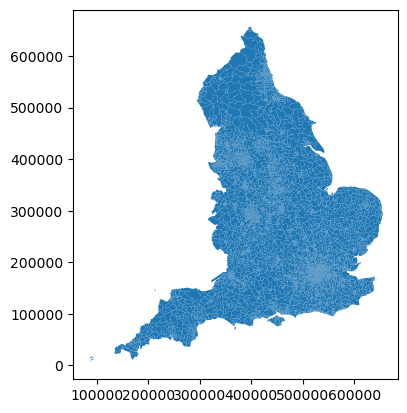

In [6]:
uk_shape.plot(); plt.show()

In [7]:
#create a df with the wards and geolocation
wards_england = pd.merge(wards, uk_shape, on=['ward', 'wardcode'], how='left')


In [8]:
wards_england

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53..."
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53..."
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52..."
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53..."
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53..."
...,...,...,...,...,...,...,...,...,...,...,...
6871,E05014383,Taunton North,None,E07000246,Somerset West and Taunton,323913.0,126373.0,-3.08643,51.0317,160720e9-7162-4251-839f-e331759b97cd,"POLYGON ((324310.999 125594.498, 324295.803 12..."
6872,E05014384,Taunton South,None,E07000246,Somerset West and Taunton,323983.0,123611.0,-3.08485,51.0068,9d858723-c47e-4d1c-9ec1-6e12680a0680,"POLYGON ((325317.803 124432.501, 325311.900 12..."
6873,E05014385,Upper Tone,None,E07000246,Somerset West and Taunton,311074.0,123888.0,-3.26887,51.0075,16c4993a-d106-4e83-b9b4-13069559c68a,"POLYGON ((311220.299 129892.098, 311237.803 12..."
6874,E05014386,Watchet & Stogursey,None,E07000246,Somerset West and Taunton,314003.0,141949.0,-3.23144,51.1703,9d4d5e5c-61d1-4580-b595-5f83df74ab7a,"POLYGON ((314976.402 137493.162, 314975.297 13..."


# UPLOAD POSTCODE DATA

In [9]:
#upload postcode data to use as merge for data that is not at ward level
postcodes = pd.read_csv('input_data/Postcode/Data/NSPL21_NOV_2023_UK.csv',low_memory=False)


In [10]:
postcodes = postcodes.rename(columns={'lat': 'LAT'})
postcodes = postcodes.rename(columns={'long': 'LONG'})
postcodes = postcodes.rename(columns={'ward': 'wardx'})
postcodes = postcodes.rename(columns={'pcds': 'Postcode'})

In [11]:
postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697530 entries, 0 to 2697529
Data columns (total 35 columns):
 #   Column    Dtype  
---  ------    -----  
 0   pcd       object 
 1   pcd2      object 
 2   Postcode  object 
 3   dointr    int64  
 4   doterm    float64
 5   usertype  int64  
 6   oseast1m  float64
 7   osnrth1m  float64
 8   osgrdind  int64  
 9   oa21      object 
 10  cty       object 
 11  ced       object 
 12  laua      object 
 13  wardx     object 
 14  nhser     object 
 15  ctry      object 
 16  rgn       object 
 17  pcon      object 
 18  ttwa      object 
 19  itl       object 
 20  npark     object 
 21  lsoa21    object 
 22  msoa21    object 
 23  wz11      object 
 24  sicbl     object 
 25  bua22     object 
 26  ru11ind   object 
 27  oac11     object 
 28  LAT       float64
 29  LONG      float64
 30  lep1      object 
 31  lep2      object 
 32  pfa       object 
 33  imd       int64  
 34  icb       object 
dtypes: float64(5), int64(4), object

# UPLOAD DATA GP

In [12]:
GP = pd.read_csv('input_data/GP/epraccur.csv', encoding='latin1')

In [13]:
GP = GP.rename(columns={'PostcodeÊ': 'Postcode'})


In [14]:
#filter data to remove C = Closed D = Dormant P = Proposed, remain OPEN

GP = GP[~GP['Status_CodeÊ'].isin(['C','D','P'])]
GP = GP.reset_index(drop=True)


In [15]:
GP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12318 entries, 0 to 12317
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Organisation_CodeÊ           12318 non-null  object 
 1   NameÊ                        12318 non-null  object 
 2   National_GroupingÊ           12256 non-null  object 
 3   High_Level_Health_Geography  12318 non-null  object 
 4   Address_Line_1Ê              12318 non-null  object 
 5   Address_Line_2               11637 non-null  object 
 6   Address_Line_3               11720 non-null  object 
 7   Address_Line_24              9147 non-null   object 
 8   Address_Line_5               205 non-null    object 
 9   Postcode                     12318 non-null  object 
 10  Open DateÊ                   12318 non-null  int64  
 11  Close_DateÊ                  0 non-null      float64
 12  Status_CodeÊ                 12318 non-null  object 
 13  Prescribing_Sett

In [16]:
#merge postocde df with GP df 
dfGP= GP.merge(postcodes, on=['Postcode'])


In [17]:
dfGP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 0 to 12293
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Organisation_CodeÊ           12294 non-null  object 
 1   NameÊ                        12294 non-null  object 
 2   National_GroupingÊ           12232 non-null  object 
 3   High_Level_Health_Geography  12294 non-null  object 
 4   Address_Line_1Ê              12294 non-null  object 
 5   Address_Line_2               11613 non-null  object 
 6   Address_Line_3               11707 non-null  object 
 7   Address_Line_24              9123 non-null   object 
 8   Address_Line_5               197 non-null    object 
 9   Postcode                     12294 non-null  object 
 10  Open DateÊ                   12294 non-null  int64  
 11  Close_DateÊ                  0 non-null      float64
 12  Status_CodeÊ                 12294 non-null  object 
 13  Prescribing_Sett

In [18]:
#create a GeoDataFrame with the GP information 
#perfom a spatial join to find out which geographical areas belong to UK wards

dfGP['Coordinates'] = list(zip(dfGP['LONG'], dfGP['LAT']))
dfGP['Coordinates'] = dfGP['Coordinates'].apply(Point)
GP_gdf = gpd.GeoDataFrame(dfGP, geometry='Coordinates')

GP_gdf.set_crs(epsg=4326, inplace=True)  
uk_shape.to_crs(epsg=4326, inplace=True)

GP_in_wards_gdf = gpd.sjoin(GP_gdf, uk_shape, how='left', predicate='within')



In [19]:
GP_in_wards_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12294 entries, 0 to 12293
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Organisation_CodeÊ           12294 non-null  object  
 1   NameÊ                        12294 non-null  object  
 2   National_GroupingÊ           12232 non-null  object  
 3   High_Level_Health_Geography  12294 non-null  object  
 4   Address_Line_1Ê              12294 non-null  object  
 5   Address_Line_2               11613 non-null  object  
 6   Address_Line_3               11707 non-null  object  
 7   Address_Line_24              9123 non-null   object  
 8   Address_Line_5               197 non-null    object  
 9   Postcode                     12294 non-null  object  
 10  Open DateÊ                   12294 non-null  int64   
 11  Close_DateÊ                  0 non-null      float64 
 12  Status_CodeÊ                 12294 non-null  object 

In [20]:
#create new df with the columns needed
GP_with_wards = GP_in_wards_gdf[['Organisation_CodeÊ', 'NameÊ','wardcode','ward','Local_Authority_D','Postcode']]

In [21]:
GP_postcode_count2 = GP_with_wards['wardcode'].nunique()

print(f'Unique values in Postcode: {GP_postcode_count2}')

GP_postcodeunique_values2 = GP_with_wards['wardcode'].unique()

print('Unique values in postcode:')
print(GP_postcodeunique_values2)

Unique values in Postcode: 4292
Unique values in postcode:
['E05001549' 'E05009872' 'E05012443' ... 'E05002201' 'E05008765'
 'E05013755']


In [22]:
GP_with_wards

,Organisation_CodeÊ,NameÊ,wardcode,ward,Local_Authority_D,Postcode
0,A81001,THE DENSHAM SURGERY,E05001549,Stockton Town Centre,Stockton-on-Tees,TS18 1HU
1,A81025,THE DOVECOT SURGERY,E05001549,Stockton Town Centre,Stockton-on-Tees,TS18 1HU
2,Y04079,SEXUAL HEALTH (STOCKTON),E05001549,Stockton Town Centre,Stockton-on-Tees,TS18 1HU
3,A81002,QUEENS PARK MEDICAL CENTRE,E05001549,Stockton Town Centre,Stockton-on-Tees,TS18 2AW
4,A81004,ACKLAM MEDICAL CENTRE,E05009872,Trimdon,Middlesbrough,TS5 8SB
...,...,...,...,...,...,...
12289,Y08443,MOIN'S CHEMIST,E05010472,Spinney Hills,Leicester,LE5 5AZ
12290,Y08445,MSE CMDU,E05004021,Billericay East,Basildon,CM12 0BH
12291,Y08453,STONEYGATE EYE HOSPITAL,E05010468,Knighton,Leicester,LE2 2PN
12292,Y08454,SONICHEM LTD,E05005422,Ravenhurst and Fosse,Blaby,LE3 2PR


In [23]:
#create a new df by counting how many GP are in each ward
unique_GP_ward = GP_with_wards.groupby(['ward','wardcode'])['NameÊ'].nunique().reset_index()
unique_GP_ward.rename(columns={'NameÊ': 'unique_name_count'}, inplace=True)


In [24]:
unique_GP_ward

,ward,wardcode,unique_name_count
0,Abbey,E05001260,3
1,Abbey,E05007474,12
2,Abbey,E05007868,4
3,Abbey,E05008136,1
4,Abbey,E05009544,1
...,...,...,...
4288,Yeovil West,E05014393,1
4289,Yetminster,E05012733,1
4290,Yew Tree,E05000915,3
4291,Yiewsley,E05013584,3


In [25]:
#merge with wards_england for mapping and fill NA counts of GP with 0
gp = pd.merge(wards_england, unique_GP_ward, on=['ward', 'wardcode'], how='left')

gp['unique_name_count'].fillna(0, inplace=True)

In [26]:
#filter useful variables
GP_count_wards = gp[['wardcode','ward','Local_Authority_D','unique_name_count']]
GP_count_wards = GP_count_wards.rename(columns={'unique_name_count': 'GP_unique_name_count'})
GP_count_wards.head()

,wardcode,ward,Local_Authority_D,GP_unique_name_count
0,E05013038,Burn Valley,Hartlepool,9.0
1,E05013039,De Bruce,Hartlepool,18.0
2,E05013040,Fens & Greatham,Hartlepool,1.0
3,E05013041,Foggy Furze,Hartlepool,2.0
4,E05013042,Hart,Hartlepool,0.0


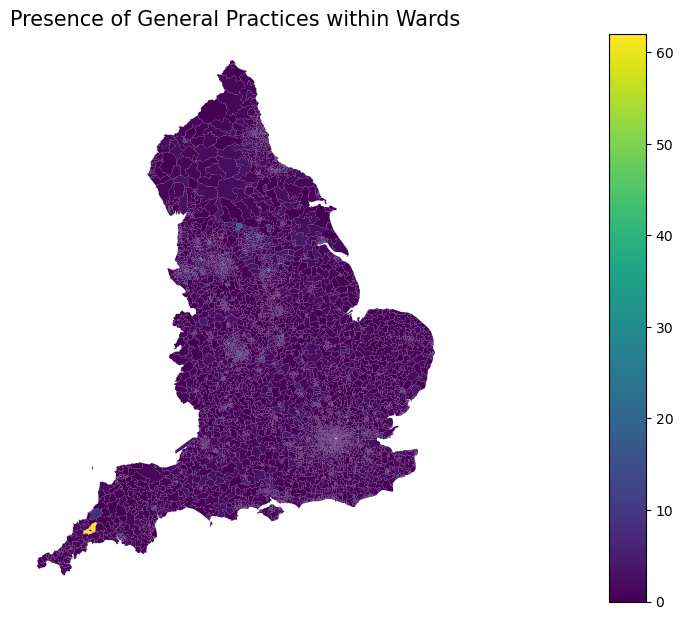

In [29]:
#merge with map for visualization
merge_a = uk_shape.merge(GP_count_wards, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_a.plot(column="GP_unique_name_count", ax=ax, legend=True, cax=cax, cmap='viridis')
ax.set_title('Presence of General Practices within Wards', fontsize=15)

plt.show()

# UPLOAD PHARMACIES

In [30]:
#upload df
pharmacy = pd.read_csv('input_data/pharmacy.csv')

In [31]:
#remove rows closed and proposed from legal status
pharmacy = pharmacy[~pharmacy['Legal Status'].isin(['Closed','Proposed'])]
pharmacy = pharmacy.reset_index(drop=True)
pharmacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11202 entries, 0 to 11201
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               11202 non-null  object
 1   Name               11202 non-null  object
 2   Primary Role Name  11202 non-null  object
 3   Legal Status       11202 non-null  object
 4   Town               11202 non-null  object
 5   County             7628 non-null   object
 6   Postcode           11202 non-null  object
dtypes: object(7)
memory usage: 612.7+ KB


In [32]:
#merge with postcode 
dfPH= pharmacy.merge(postcodes, on=['Postcode'])
dfPH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11201 entries, 0 to 11200
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               11201 non-null  object 
 1   Name               11201 non-null  object 
 2   Primary Role Name  11201 non-null  object 
 3   Legal Status       11201 non-null  object 
 4   Town               11201 non-null  object 
 5   County             7627 non-null   object 
 6   Postcode           11201 non-null  object 
 7   pcd                11201 non-null  object 
 8   pcd2               11201 non-null  object 
 9   dointr             11201 non-null  int64  
 10  doterm             22 non-null     float64
 11  usertype           11201 non-null  int64  
 12  oseast1m           11177 non-null  float64
 13  osnrth1m           11177 non-null  float64
 14  osgrdind           11201 non-null  int64  
 15  oa21               11201 non-null  object 
 16  cty                112

In [33]:
#create a GeoDataFrame with the GP information 
#perfom a spatial join to find out which geographical areas belong to UK wards

dfPH['Coordinates'] = list(zip(dfPH['LONG'], dfPH['LAT']))
dfPH['Coordinates'] = dfPH['Coordinates'].apply(Point)
PH_gdf = gpd.GeoDataFrame(dfPH, geometry='Coordinates')

PH_gdf.set_crs(epsg=4326, inplace=True)  
uk_shape.to_crs(epsg=4326, inplace=True)

PH_in_wards_gdf = gpd.sjoin(PH_gdf, uk_shape, how='left', predicate='within')

PH_with_wards = PH_in_wards_gdf[['Code', 'Name','Primary Role Name','wardcode','ward','Legal Status','Postcode']]


In [34]:
#create a new df by counting how many Pharmacies are in each ward

unique_ph_ward = PH_with_wards.groupby(['ward', 'wardcode'])['Name'].nunique().reset_index()

unique_ph_ward.rename(columns={'Name': 'unique_name_count'}, inplace=True)
unique_ph_ward

,ward,wardcode,unique_name_count
0,Abbey,E05001260,4
1,Abbey,E05001767,2
2,Abbey,E05007474,6
3,Abbey,E05007868,5
4,Abbey,E05009544,3
...,...,...,...
4904,Yeovil West,E05014393,1
4905,Yew Tree,E05000915,4
4906,Yewdale,E05014216,1
4907,Yiewsley,E05013584,3


In [35]:
#merge with wards_england for mapping and fill NA counts of PH with 0

ph = pd.merge(wards_england, unique_ph_ward, on=['ward', 'wardcode'], how='left')

ph['unique_name_count'].fillna(0, inplace=True)
ph

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,unique_name_count
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",3.0
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",2.0
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",2.0
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",2.0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6871,E05014383,Taunton North,None,E07000246,Somerset West and Taunton,323913.0,126373.0,-3.08643,51.0317,160720e9-7162-4251-839f-e331759b97cd,"POLYGON ((324310.999 125594.498, 324295.803 12...",2.0
6872,E05014384,Taunton South,None,E07000246,Somerset West and Taunton,323983.0,123611.0,-3.08485,51.0068,9d858723-c47e-4d1c-9ec1-6e12680a0680,"POLYGON ((325317.803 124432.501, 325311.900 12...",2.0
6873,E05014385,Upper Tone,None,E07000246,Somerset West and Taunton,311074.0,123888.0,-3.26887,51.0075,16c4993a-d106-4e83-b9b4-13069559c68a,"POLYGON ((311220.299 129892.098, 311237.803 12...",1.0
6874,E05014386,Watchet & Stogursey,None,E07000246,Somerset West and Taunton,314003.0,141949.0,-3.23144,51.1703,9d4d5e5c-61d1-4580-b595-5f83df74ab7a,"POLYGON ((314976.402 137493.162, 314975.297 13...",2.0


In [36]:
#filter useful variables

PH_count_wards = ph[['wardcode','ward','Local_Authority_D','unique_name_count']]
PH_count_wards = PH_count_wards.rename(columns={'unique_name_count': 'PH_unique_name_count'})
PH_count_wards

,wardcode,ward,Local_Authority_D,PH_unique_name_count
0,E05013038,Burn Valley,Hartlepool,3.0
1,E05013039,De Bruce,Hartlepool,2.0
2,E05013040,Fens & Greatham,Hartlepool,2.0
3,E05013041,Foggy Furze,Hartlepool,2.0
4,E05013042,Hart,Hartlepool,1.0
...,...,...,...,...
6871,E05014383,Taunton North,Somerset West and Taunton,2.0
6872,E05014384,Taunton South,Somerset West and Taunton,2.0
6873,E05014385,Upper Tone,Somerset West and Taunton,1.0
6874,E05014386,Watchet & Stogursey,Somerset West and Taunton,2.0


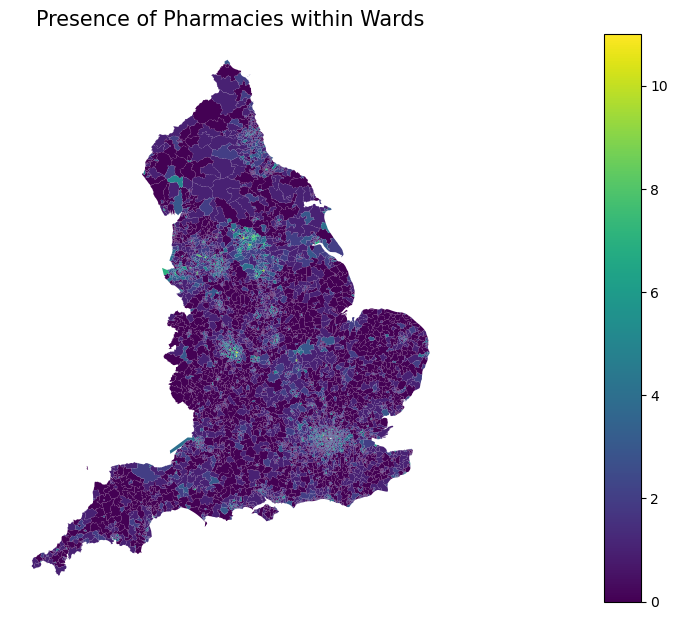

In [37]:
#merge with map for visualization

merge_b = uk_shape.merge(PH_count_wards, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_b.plot(column="PH_unique_name_count", ax=ax, legend=True, cax=cax, cmap='viridis')
ax.set_title('Presence of Pharmacies within Wards', fontsize=15)

plt.show()

# UPLOAD Primary Schools

In [38]:
#UPLOAD DATA
Primary_schools = pd.read_csv('input_data/primary_schools.csv', encoding='latin1')

In [39]:
Primary_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16922 entries, 0 to 16921
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EstablishmentNumber            16922 non-null  int64 
 1   EstablishmentName              16922 non-null  object
 2   EstablishmentTypeGroup (code)  16922 non-null  int64 
 3   EstablishmentTypeGroup (name)  16922 non-null  object
 4   EstablishmentStatus (name)     16922 non-null  object
 5   PhaseOfEducation (code)        16922 non-null  int64 
 6   PhaseOfEducation (name)        16922 non-null  object
 7   Town                           16888 non-null  object
 8   Postcode                       16921 non-null  object
 9   AdministrativeWard (code)      16922 non-null  object
 10  AdministrativeWard (name)      16921 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [40]:
#Merge data with postocdes df
dfpri= Primary_schools.merge(postcodes, on=['Postcode'])


In [41]:
#create a GeoDataFrame with the GP information 
#perfom a spatial join to find out which geographical areas belong to UK wards

dfpri['Coordinates'] = list(zip(dfpri['LONG'], dfpri['LAT']))
dfpri['Coordinates'] = dfpri['Coordinates'].apply(Point)
pri_gdf = gpd.GeoDataFrame(dfpri, geometry='Coordinates')

pri_gdf.set_crs(epsg=4326, inplace=True)  
uk_shape.to_crs(epsg=4326, inplace=True)

pri_in_wards_gdf = gpd.sjoin(pri_gdf, uk_shape, how='left', predicate='within')

pri_with_wards = pri_in_wards_gdf[['EstablishmentName', 'EstablishmentTypeGroup (name)','wardcode','ward','Postcode']]

In [42]:
pri_with_wards.head()

,EstablishmentName,EstablishmentTypeGroup (name),wardcode,ward,Postcode
0,The Aldgate School,Local authority maintained schools,E05009308,Portsoken,EC3A 5DE
1,Argyle Primary School,Local authority maintained schools,E05013666,King's Cross,WC1H 9EG
2,West Hampstead Primary School,Local authority maintained schools,E05013656,Fortune Green,NW6 1QL
3,Brecknock Primary School,Local authority maintained schools,E05013654,Camden Square,NW1 9AL
4,Brookfield Primary School,Local authority maintained schools,E05013661,Highgate,N19 5DH


In [43]:
#create a new df by counting how many Primary Schools are in each ward

primary_s = uk_shape.merge(pri_with_wards, on=['wardcode', 'ward'])
unique_Pri_ward = primary_s.groupby(['ward', 'wardcode'])['EstablishmentName'].nunique().reset_index()
unique_Pri_ward.rename(columns={'EstablishmentName': 'unique_name_count'}, inplace=True)


In [44]:
#merge with wards_england for mapping and fill NA counts of Primary Schools with 0

Pri_s = pd.merge(wards_england, unique_Pri_ward, on=['ward', 'wardcode'], how='left')

Pri_s['unique_name_count'].fillna(0, inplace=True)
Pri_s.head()

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,unique_name_count
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",4.0
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",3.0
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",3.0
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",3.0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",2.0


In [45]:
#filter useful variables

Pri_count_wards = Pri_s[['wardcode','ward','Local_Authority_D','unique_name_count']]
Pri_count_wards = Pri_count_wards.rename(columns={'unique_name_count': 'PriS_unique_name_count'})
Pri_count_wards.head()

,wardcode,ward,Local_Authority_D,PriS_unique_name_count
0,E05013038,Burn Valley,Hartlepool,4.0
1,E05013039,De Bruce,Hartlepool,3.0
2,E05013040,Fens & Greatham,Hartlepool,3.0
3,E05013041,Foggy Furze,Hartlepool,3.0
4,E05013042,Hart,Hartlepool,2.0


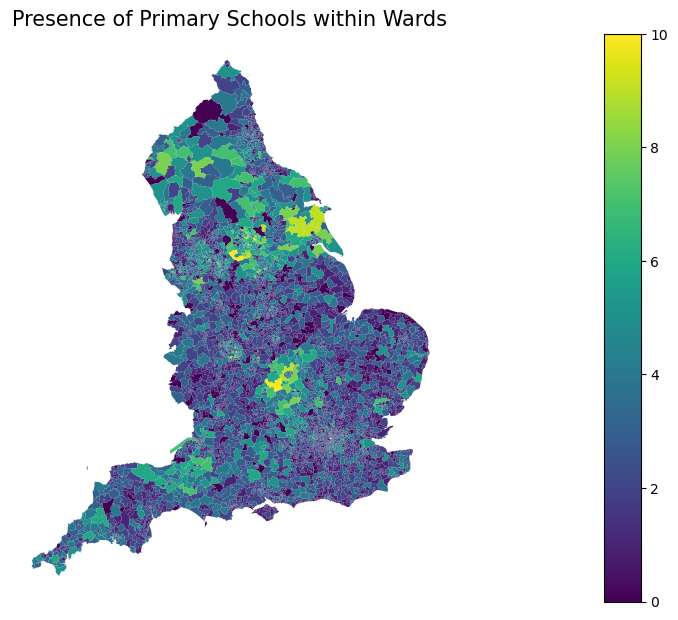

In [46]:
# Merge the GeoDataFrame for visualization
merge_c = uk_shape.merge(Pri_count_wards, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_c.plot(column="PriS_unique_name_count", ax=ax, legend=True, cax=cax, cmap='viridis')
ax.set_title('Presence of Primary Schools within Wards', fontsize=15)

plt.show()

# UPLOAD Universities

In [47]:
uni = pd.read_csv('input_data/universities.csv')

In [48]:
#merge postocde df with Universities df 

dfuni= uni.merge(postcodes, on=['Postcode'])


In [49]:
#create a GeoDataFrame with the UNI information 
#perfom a spatial join to find out which geographical areas belong to UK wards

dfuni['Coordinates'] = list(zip(dfuni['LONG'], dfuni['LAT']))
dfuni['Coordinates'] = dfuni['Coordinates'].apply(Point)
Uni_gdf = gpd.GeoDataFrame(dfuni, geometry='Coordinates')

Uni_gdf.set_crs(epsg=4326, inplace=True)  
uk_shape.to_crs(epsg=4326, inplace=True)

Uni_in_wards_gdf = gpd.sjoin(Uni_gdf, uk_shape, how='left', predicate='within')

Uni_with_wards = Uni_in_wards_gdf[['EstablishmentName', 'TypeOfEstablishment (name)','wardcode','ward','Postcode']]
Uni_with_wards.head()

,EstablishmentName,TypeOfEstablishment (name),wardcode,ward,Postcode
0,Leeds College of Music,Higher education institutions,E05011403,Little London & Woodhouse,LS2 7PD
1,Leeds Arts University,Higher education institutions,E05011403,Little London & Woodhouse,LS2 9AQ
2,Arts University Plymouth,Higher education institutions,E05002094,St Peter and the Waterfront,PL4 8AT
3,Falmouth University,Higher education institutions,E05013284,Falmouth Arwenack,TR11 4RH
4,University of Hertfordshire,Higher education institutions,E05011063,Hatfield South West,AL10 9AB


In [50]:
#create a new df by to determine which ward each uni is within

unique_Uni_ward = Uni_with_wards.groupby(['ward', 'wardcode'])['EstablishmentName'].nunique().reset_index()

unique_Uni_ward.rename(columns={'EstablishmentName': 'unique_name_count'}, inplace=True)
unique_Uni_ward.head()

,ward,wardcode,unique_name_count
0,Abbey,E05010696,1
1,Abbey,E05013120,1
2,Alexandra,E05007117,1
3,Allestree,E05001768,1
4,Arsenal,E05013697,1


In [51]:
#merge with wards_england for mapping and fill NA counts of Uni with 0

uni = pd.merge(wards_england, unique_Uni_ward, on=['ward', 'wardcode'], how='left')

uni['unique_name_count'].fillna(0, inplace=True)
uni.head()

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,unique_name_count
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",0.0
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",0.0
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",0.0
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",0.0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",0.0


In [52]:
#filter useful variables
uni_2 = uni[['wardcode','ward','Local_Authority_D','unique_name_count']]

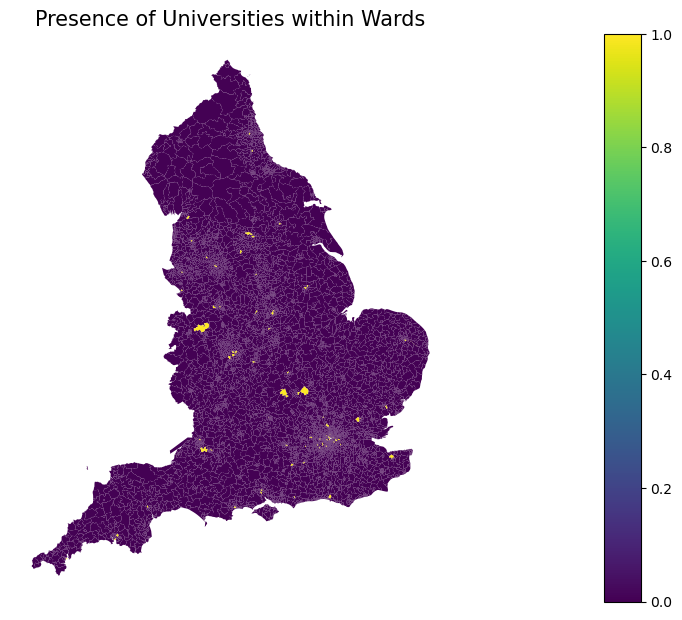

In [53]:
#merge with map for visualization

merge_2 = uk_shape.merge(uni_2, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_2.plot(column="unique_name_count", ax=ax, legend=True, cax=cax, cmap='viridis',vmin=0, vmax=1)
ax.set_title('Presence of Universities within Wards', fontsize=15)

plt.show()


In [54]:
#create a new df where count is an ordinal variables with the following scoring system:
# 2 = if a university is located within the ward
# 1 = if a university is located within the local authority of the ward
# 0 = if there is no university within the ward or the local authority of the ward

local_authorities_with_uni = set(uni.loc[uni['unique_name_count'] > 0, 'Local_Authority_D'])

def calculate_score(row):
    if row['unique_name_count'] > 0:
        return 2
    elif row['Local_Authority_D'] in local_authorities_with_uni:
        return 1
    else:
        return 0

uni['score'] = uni.apply(calculate_score, axis=1)

uni = uni[['wardcode', 'ward', 'WD22NMW', 'LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry', 'unique_name_count', 'score']]

uni.head()

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,unique_name_count,score
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",0.0,0
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",0.0,0
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",0.0,0
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",0.0,0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",0.0,0


In [55]:
#filter useful variables

uni_score_wards = uni[['wardcode','ward','Local_Authority_D','score']]
uni_score_wards = uni_score_wards.rename(columns={'score': 'Uni_score_ward'})
uni_score_wards.head()

,wardcode,ward,Local_Authority_D,Uni_score_ward
0,E05013038,Burn Valley,Hartlepool,0
1,E05013039,De Bruce,Hartlepool,0
2,E05013040,Fens & Greatham,Hartlepool,0
3,E05013041,Foggy Furze,Hartlepool,0
4,E05013042,Hart,Hartlepool,0


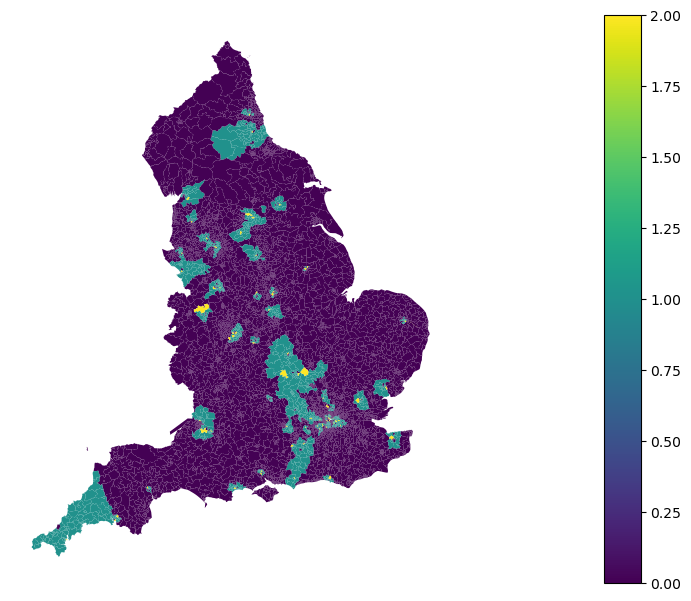

In [56]:
#merge with map for visualization

merge_1 = uk_shape.merge(uni_score_wards, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_1.plot(column="Uni_score_ward", ax=ax, legend=True, cax=cax, cmap='viridis', vmin=0, vmax=2)
plt.show()


# UPLOAD Airport

In [57]:
airport_shape = gpd.read_file('input_data/Location_of_UK_Airports-shp/1a856d1c-9bf7-4ceb-84b5-f172b938f7b72020411-1-tt9867.jioj.shp')

In [58]:
#perfom a spatial join to find out which geographical areas belong to UK wards

airport_shape = airport_shape.to_crs(uk_shape.crs)

airports_in_wards = gpd.sjoin(airport_shape, uk_shape, how="left", predicate="within")

print(airports_in_wards.info())

airports_in_wards = airports_in_wards[['Airport', 'X', 'Y', 'wardcode', 'ward', 'LAD22CD', 'geometry']]
print(airports_in_wards.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Airport            59 non-null     object  
 1   Y                  59 non-null     float64 
 2   X                  59 non-null     float64 
 3   FID                59 non-null     int64   
 4   geometry           59 non-null     geometry
 5   index_right        36 non-null     float64 
 6   wardcode           36 non-null     object  
 7   ward               36 non-null     object  
 8   WD22NMW            0 non-null      object  
 9   LAD22CD            36 non-null     object  
 10  Local_Authority_D  36 non-null     object  
 11  BNG_E              36 non-null     float64 
 12  BNG_N              36 non-null     float64 
 13  LONG               36 non-null     float64 
 14  LAT                36 non-null     float64 
 15  GlobalID           36 non-null     object  
dtypes:

In [59]:
#create a new df by to determine which ward each airport is within

unique_airport_ward = airports_in_wards.groupby(['ward', 'wardcode'])['Airport'].nunique().reset_index()

unique_airport_ward.rename(columns={'Airport': 'unique_name_count'}, inplace=True)
unique_airport_ward.head()

,ward,wardcode,unique_name_count
0,Bickenhill,E05001284,1
1,Biggin Hill,E05013989,1
2,Broadclyst,E05011784,1
3,Callerton & Throckley,E05011440,1
4,Catton Grove,E05012902,1


In [60]:
#merge with wards_england for mapping and fill NA counts of airports with 0

air = pd.merge(wards_england, unique_airport_ward, on=['ward', 'wardcode'], how='left')

air['unique_name_count'].fillna(0, inplace=True)
air.head()

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,unique_name_count
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",0.0
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",0.0
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",0.0
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",0.0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",0.0


In [61]:
#filter useful variables
air_count_wards = air[['wardcode','ward','Local_Authority_D','unique_name_count']]
air_count_wards = air_count_wards.rename(columns={'unique_name_count': 'airport_unique_name_count'})
air_count_wards.head()

,wardcode,ward,Local_Authority_D,airport_unique_name_count
0,E05013038,Burn Valley,Hartlepool,0.0
1,E05013039,De Bruce,Hartlepool,0.0
2,E05013040,Fens & Greatham,Hartlepool,0.0
3,E05013041,Foggy Furze,Hartlepool,0.0
4,E05013042,Hart,Hartlepool,0.0


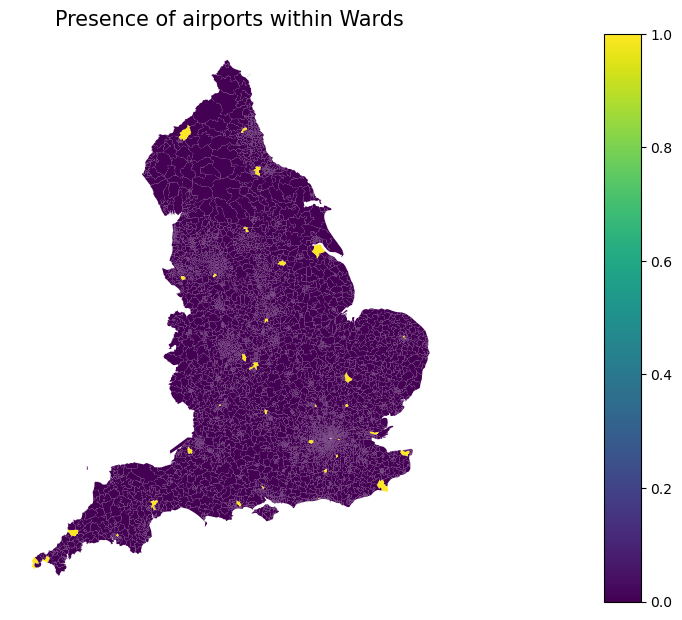

In [62]:
#merge with map for visualization

merge_e = uk_shape.merge(air_count_wards, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_e.plot(column="airport_unique_name_count", ax=ax, legend=True, cax=cax, cmap='viridis')
ax.set_title('Presence of airports within Wards', fontsize=15)

plt.show()

In [63]:
#create a new df where count is an ordinal variables with the following scoring system:
# 2 = if a airpot is located within the ward
# 1 = if a airport is located within the local authority of the ward
# 0 = if there is no airport within the ward or the local authority of the ward

local_authorities_with_airport = set(air.loc[air['unique_name_count'] > 0, 'Local_Authority_D'])

def calculate_score(row):
    if row['unique_name_count'] > 0:
        return 2
    elif row['Local_Authority_D'] in local_authorities_with_airport:
        return 1
    else:
        return 0

air['score'] = air.apply(calculate_score, axis=1)

air = air[['wardcode', 'ward', 'WD22NMW', 'LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry', 'unique_name_count', 'score']]

air.head()

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,unique_name_count,score
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",0.0,0
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",0.0,0
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",0.0,0
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",0.0,0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",0.0,0


In [64]:
#create new df with useful variables
air_score_wards = air[['wardcode','ward','Local_Authority_D','score']]
air_score_wards = air_score_wards.rename(columns={'score': 'air_score_ward'})
air_score_wards.head()

,wardcode,ward,Local_Authority_D,air_score_ward
0,E05013038,Burn Valley,Hartlepool,0
1,E05013039,De Bruce,Hartlepool,0
2,E05013040,Fens & Greatham,Hartlepool,0
3,E05013041,Foggy Furze,Hartlepool,0
4,E05013042,Hart,Hartlepool,0


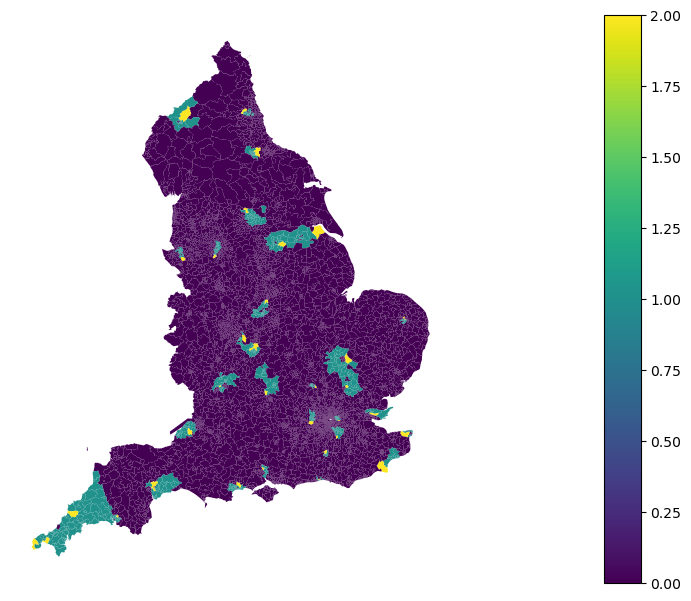

In [65]:
#merge with map for visualization

merge_f = uk_shape.merge(air_score_wards, on=['wardcode'])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_f.plot(column="air_score_ward", ax=ax, legend=True, cax=cax, cmap='viridis', vmin=0, vmax=2)
plt.show()

# Upload Census data

In [66]:
TS008Sex= pd.read_excel("input_data/TS008_Sex.xlsx")

TS041NoH= pd.read_excel("input_data/TS041_Number_of_Households.xlsx")

TS021ETH = pd.read_excel("input_data/TS021_1 - Ethnic group.xlsx")

TS004PoB = pd.read_excel('input_data/TS004 - Country of birth.xlsx')

TS004GH = pd.read_excel('input_data/TS037 - General health.xlsx')


In [67]:

TS007Age= pd.read_csv("input_data/TS007 _Age_by_single_year.csv")

TS011HDL= pd.read_csv("input_data/TS011_Householdsbydeprivationdimensions .csv")

TS062NSC = pd.read_csv ("input_data/TS062_NS-SeC.csv")

TS067HLQ = pd.read_csv("input_data/TS067_Highestlevelofqualification .csv")

TS066EAS = pd.read_csv("input_data/TS066 - Economic activity status.csv")

TS054Ten = pd.read_csv("input_data/TS054_Tenure.csv")

In [68]:
#Merge with wards_england for local authority variable

TS004GH = pd.merge(wards_england, TS004GH, on=['ward', 'wardcode'], how='left') #not included in the cluster

TS006PD = pd.merge(wards_england, TS006PD, on=['ward', 'wardcode'], how='left')

TS004PoB = pd.merge(wards_england, TS004PoB, on=['ward', 'wardcode'], how='left')

TS008Sex= pd.merge(wards_england, TS008Sex, on=['ward', 'wardcode'], how='left')

TS041NoH= pd.merge(wards_england, TS041NoH, on=['ward', 'wardcode'], how='left')

TS007Age= pd.merge(wards_england, TS007Age, on=['ward', 'wardcode'], how='left')

TS011HDL= pd.merge(wards_england, TS011HDL, on=['ward', 'wardcode'], how='left')

TS021ETH = pd.merge(wards_england, TS021ETH, on=['ward', 'wardcode'], how='left')

TS062NSC = pd.merge(wards_england, TS062NSC, on=['ward', 'wardcode'], how='left')

TS067HLQ = pd.merge(wards_england, TS067HLQ, on=['ward', 'wardcode'], how='left')

TS066EAS = pd.merge(wards_england, TS066EAS, on=['ward', 'wardcode'], how='left')

TS054Ten = pd.merge(wards_england, TS054Ten, on=['ward', 'wardcode'], how='left')

In [69]:
TS006PD

,wardcode,ward,WD22NMW,LAD22CD,Local_Authority_D,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,pop_density_sqrkilometer
0,E05013038,Burn Valley,None,E06000001,Hartlepool,450566.0,531848.0,-1.21731,54.6792,2dab1c49-5560-4fbf-9d11-71814fbee60a,"POLYGON ((451700.321 531904.684, 451699.520 53...",2895.6
1,E05013039,De Bruce,None,E06000001,Hartlepool,449502.0,535358.0,-1.23321,54.7108,19c03834-3059-4aa2-8b11-c3d509b99a11,"POLYGON ((449715.875 536212.109, 449196.136 53...",2722.9
2,E05013040,Fens & Greatham,None,E06000001,Hartlepool,448737.0,528168.0,-1.24628,54.6463,ec6f5a22-4115-4ff0-9d16-fe5f800b90aa,"POLYGON ((449272.741 529151.764, 449284.450 52...",331.5
3,E05013041,Foggy Furze,None,E06000001,Hartlepool,450220.0,530974.0,-1.22282,54.6713,0906989a-9b02-433d-8305-80ca65e6c7aa,"POLYGON ((451057.904 530946.498, 451057.904 53...",4832.0
4,E05013042,Hart,None,E06000001,Hartlepool,447099.0,535099.0,-1.27055,54.7087,aa0ae2d6-69ff-4c71-97df-a16f04e5b16d,"POLYGON ((448290.103 536324.798, 448182.397 53...",676.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6871,E05014383,Taunton North,None,E07000246,Somerset West and Taunton,323913.0,126373.0,-3.08643,51.0317,160720e9-7162-4251-839f-e331759b97cd,"POLYGON ((324310.999 125594.498, 324295.803 12...",3095.5
6872,E05014384,Taunton South,None,E07000246,Somerset West and Taunton,323983.0,123611.0,-3.08485,51.0068,9d858723-c47e-4d1c-9ec1-6e12680a0680,"POLYGON ((325317.803 124432.501, 325311.900 12...",3187.8
6873,E05014385,Upper Tone,None,E07000246,Somerset West and Taunton,311074.0,123888.0,-3.26887,51.0075,16c4993a-d106-4e83-b9b4-13069559c68a,"POLYGON ((311220.299 129892.098, 311237.803 12...",64.5
6874,E05014386,Watchet & Stogursey,None,E07000246,Somerset West and Taunton,314003.0,141949.0,-3.23144,51.1703,9d4d5e5c-61d1-4580-b595-5f83df74ab7a,"POLYGON ((314976.402 137493.162, 314975.297 13...",112.4


# MERGE CENSUS DATA

In [70]:
#merge df and drop unnecesary columns
df1 = pd.merge(TS006PD,TS004PoB, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])
df1 = pd.merge(df1,TS041NoH, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])
df1 = pd.merge(df1,TS008Sex, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])
df1 = pd.merge(df1,TS066EAS, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])


df1 = df1.drop(columns=['WD22NMW','LAD22CD','BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry','number_households','Ptotal_population','total_populationF','total_populationM','inemployment_notstudent','unemployed_notstudent','inemployment_fullstudent','unemployed_fullstudent','EconomicallyInactive'])

df1.head()

,wardcode,ward,Local_Authority_D,pop_density_sqrkilometer,Pborn_Europe,Pborn_Africa,Pborn_MEandAsia,Pborn_AmericaandCarib,Pborn_AntarOceaniaOther,Pborn_Brithish_Overseas,total_population,Ptotal_populationF,Ptotal_populationM,Pinemployment_notstudent,Punemployed_notstudent,Pinemployment_fullstudent,Punemployed_fullstudent,PEconomicallyInactive
0,E05013038,Burn Valley,Hartlepool,2895.6,97.1,0.8,1.9,0.2,0.1,0.0,7631,51.3,48.7,45.3,3.9,1.4,0.7,48.6
1,E05013039,De Bruce,Hartlepool,2722.9,98.4,0.4,1.0,0.1,0.1,0.0,8055,52.4,47.6,44.4,4.3,1.5,0.5,49.2
2,E05013040,Fens & Greatham,Hartlepool,331.5,98.8,0.2,0.7,0.1,0.1,0.0,6380,52.1,47.9,49.3,1.9,1.0,0.5,47.3
3,E05013041,Foggy Furze,Hartlepool,4832.0,97.2,0.9,1.5,0.3,0.1,0.0,8154,51.3,48.7,46.4,4.1,0.6,0.4,48.4
4,E05013042,Hart,Hartlepool,676.0,98.9,0.2,0.7,0.2,0.1,0.0,7644,51.8,48.2,62.2,1.7,1.5,0.5,34.1


In [71]:
#merge df and drop unnecesary columns

df2 = pd.merge(TS007Age, TS021ETH, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])

selected_columns = [col for col in df2.columns if col.startswith('P')]

selected_columns = ['wardcode', 'ward', 'Local_Authority_D'] + selected_columns

dfdraft = df2[selected_columns].copy()

df2 = dfdraft.drop(columns=['P16_age','P17_age','P18_age','P19_age'])


df2.head()

,wardcode,ward,Local_Authority_D,Ptotal_residents,P4_age,P5to9_age,P10to15_age,P16to19_age,P20to24_age,P25to34_age,...,P50to64_age,P65to74_age,P75to84_age,P85andover_age,Pasian,Pblack,Pmixed,Pwhite,Parab,Pother_ethnic
0,E05013038,Burn Valley,Hartlepool,100,4.7,5.6,8.3,5.6,6.8,10.6,...,20.8,10.8,5.5,3.2,2.8,0.6,1.0,94.8,0.4,0.4
1,E05013039,De Bruce,Hartlepool,100,7.2,7.0,8.4,4.6,6.2,12.5,...,20.4,9.9,5.4,2.5,1.0,0.5,0.7,97.5,0.1,0.2
2,E05013040,Fens & Greatham,Hartlepool,100,3.3,4.3,5.9,3.2,4.0,9.6,...,24.3,16.4,10.3,4.3,0.5,0.2,0.3,98.8,0.2,0.1
3,E05013041,Foggy Furze,Hartlepool,100,5.3,6.1,6.9,4.0,4.9,13.0,...,22.3,12.5,6.5,2.5,1.3,1.1,0.5,96.2,0.5,0.4
4,E05013042,Hart,Hartlepool,100,5.0,6.4,8.2,4.4,5.1,12.8,...,19.9,10.1,5.3,1.6,0.7,0.1,0.8,98.2,0.1,0.1


In [72]:
#merge df and drop unnecesary columns

df3 = pd.merge(TS011HDL, TS067HLQ, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])


df3 = pd.merge(df3, TS062NSC, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])

df3 = pd.merge(df3, TS054Ten, on=['wardcode', 'ward','WD22NMW','LAD22CD', 'Local_Authority_D', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'])

selected_columnsdf2 = [col for col in df3.columns if col.startswith('P')]

selected_columns2 = ['ward', 'wardcode','Local_Authority_D'] + selected_columnsdf2 

dfdraft2 = df3[selected_columns2].copy()

df3 = dfdraft2.drop(columns=['Pnumber_households','Presidentsover16'])
df3.head()

,ward,wardcode,Local_Authority_D,Phousehold_notdeprived,Phousehold_deprived1D,Phousehold_deprived2D,Phousehold_deprived3D,Phousehold_deprived4D,Presi_noquali,Presi_L1qualification,...,PL10toL11_NS,PL12_NS,PL13_NS,PL14_NS,PL15_NS,PhouseOwned,PhouseSharedOwn,PhouseSocialRented,PhousePrivateRented,PhouseLivesRentFree
0,Burn Valley,E05013038,Hartlepool,40.5,33.2,19.5,6.6,0.2,22.5,10.1,...,6.0,13.6,14.2,15.6,9.0,55.5,0.2,21.7,22.4,0.2
1,De Bruce,E05013039,Hartlepool,35.6,33.3,23.4,7.4,0.2,27.9,11.3,...,6.5,17.8,19.5,17.9,6.1,46.7,0.8,38.3,14.2,0.1
2,Fens & Greatham,E05013040,Hartlepool,46.9,36.1,14.5,2.4,0.0,21.4,8.8,...,8.0,14.2,14.0,10.4,4.2,80.1,0.1,8.9,10.9,0.0
3,Foggy Furze,E05013041,Hartlepool,39.1,34.5,20.4,5.8,0.1,26.3,10.1,...,7.0,16.8,17.9,15.9,4.9,60.8,0.6,16.3,22.0,0.2
4,Hart,E05013042,Hartlepool,55.7,30.6,12.1,1.6,0.0,14.4,7.1,...,7.0,12.0,11.6,6.8,6.2,76.4,1.5,9.9,12.2,0.0


In [73]:
#merge df into one final df

df4 = pd.merge(df1, df2, on=['wardcode', 'ward','Local_Authority_D'])

df4 = pd.merge(df4, df3, on=['wardcode', 'ward','Local_Authority_D'])
df4['ward'] = df4['ward'].astype('string')
df4['wardcode'] = df4['wardcode'].astype('string')
df4.head()

,wardcode,ward,Local_Authority_D,pop_density_sqrkilometer,Pborn_Europe,Pborn_Africa,Pborn_MEandAsia,Pborn_AmericaandCarib,Pborn_AntarOceaniaOther,Pborn_Brithish_Overseas,...,PL10toL11_NS,PL12_NS,PL13_NS,PL14_NS,PL15_NS,PhouseOwned,PhouseSharedOwn,PhouseSocialRented,PhousePrivateRented,PhouseLivesRentFree
0,E05013038,Burn Valley,Hartlepool,2895.6,97.1,0.8,1.9,0.2,0.1,0.0,...,6.0,13.6,14.2,15.6,9.0,55.5,0.2,21.7,22.4,0.2
1,E05013039,De Bruce,Hartlepool,2722.9,98.4,0.4,1.0,0.1,0.1,0.0,...,6.5,17.8,19.5,17.9,6.1,46.7,0.8,38.3,14.2,0.1
2,E05013040,Fens & Greatham,Hartlepool,331.5,98.8,0.2,0.7,0.1,0.1,0.0,...,8.0,14.2,14.0,10.4,4.2,80.1,0.1,8.9,10.9,0.0
3,E05013041,Foggy Furze,Hartlepool,4832.0,97.2,0.9,1.5,0.3,0.1,0.0,...,7.0,16.8,17.9,15.9,4.9,60.8,0.6,16.3,22.0,0.2
4,E05013042,Hart,Hartlepool,676.0,98.9,0.2,0.7,0.2,0.1,0.0,...,7.0,12.0,11.6,6.8,6.2,76.4,1.5,9.9,12.2,0.0


In [74]:

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 6875
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wardcode                   6876 non-null   string 
 1   ward                       6876 non-null   string 
 2   Local_Authority_D          6125 non-null   object 
 3   pop_density_sqrkilometer   6876 non-null   float64
 4   Pborn_Europe               6876 non-null   float64
 5   Pborn_Africa               6876 non-null   float64
 6   Pborn_MEandAsia            6876 non-null   float64
 7   Pborn_AmericaandCarib      6876 non-null   float64
 8   Pborn_AntarOceaniaOther    6876 non-null   float64
 9   Pborn_Brithish_Overseas    6876 non-null   float64
 10  total_population           6876 non-null   int64  
 11  Ptotal_populationF         6876 non-null   float64
 12  Ptotal_populationM         6876 non-null   float64
 13  Pinemployment_notstudent   6876 non-null   float

# basic statistics on census df

<Figure size 2000x3900 with 0 Axes>

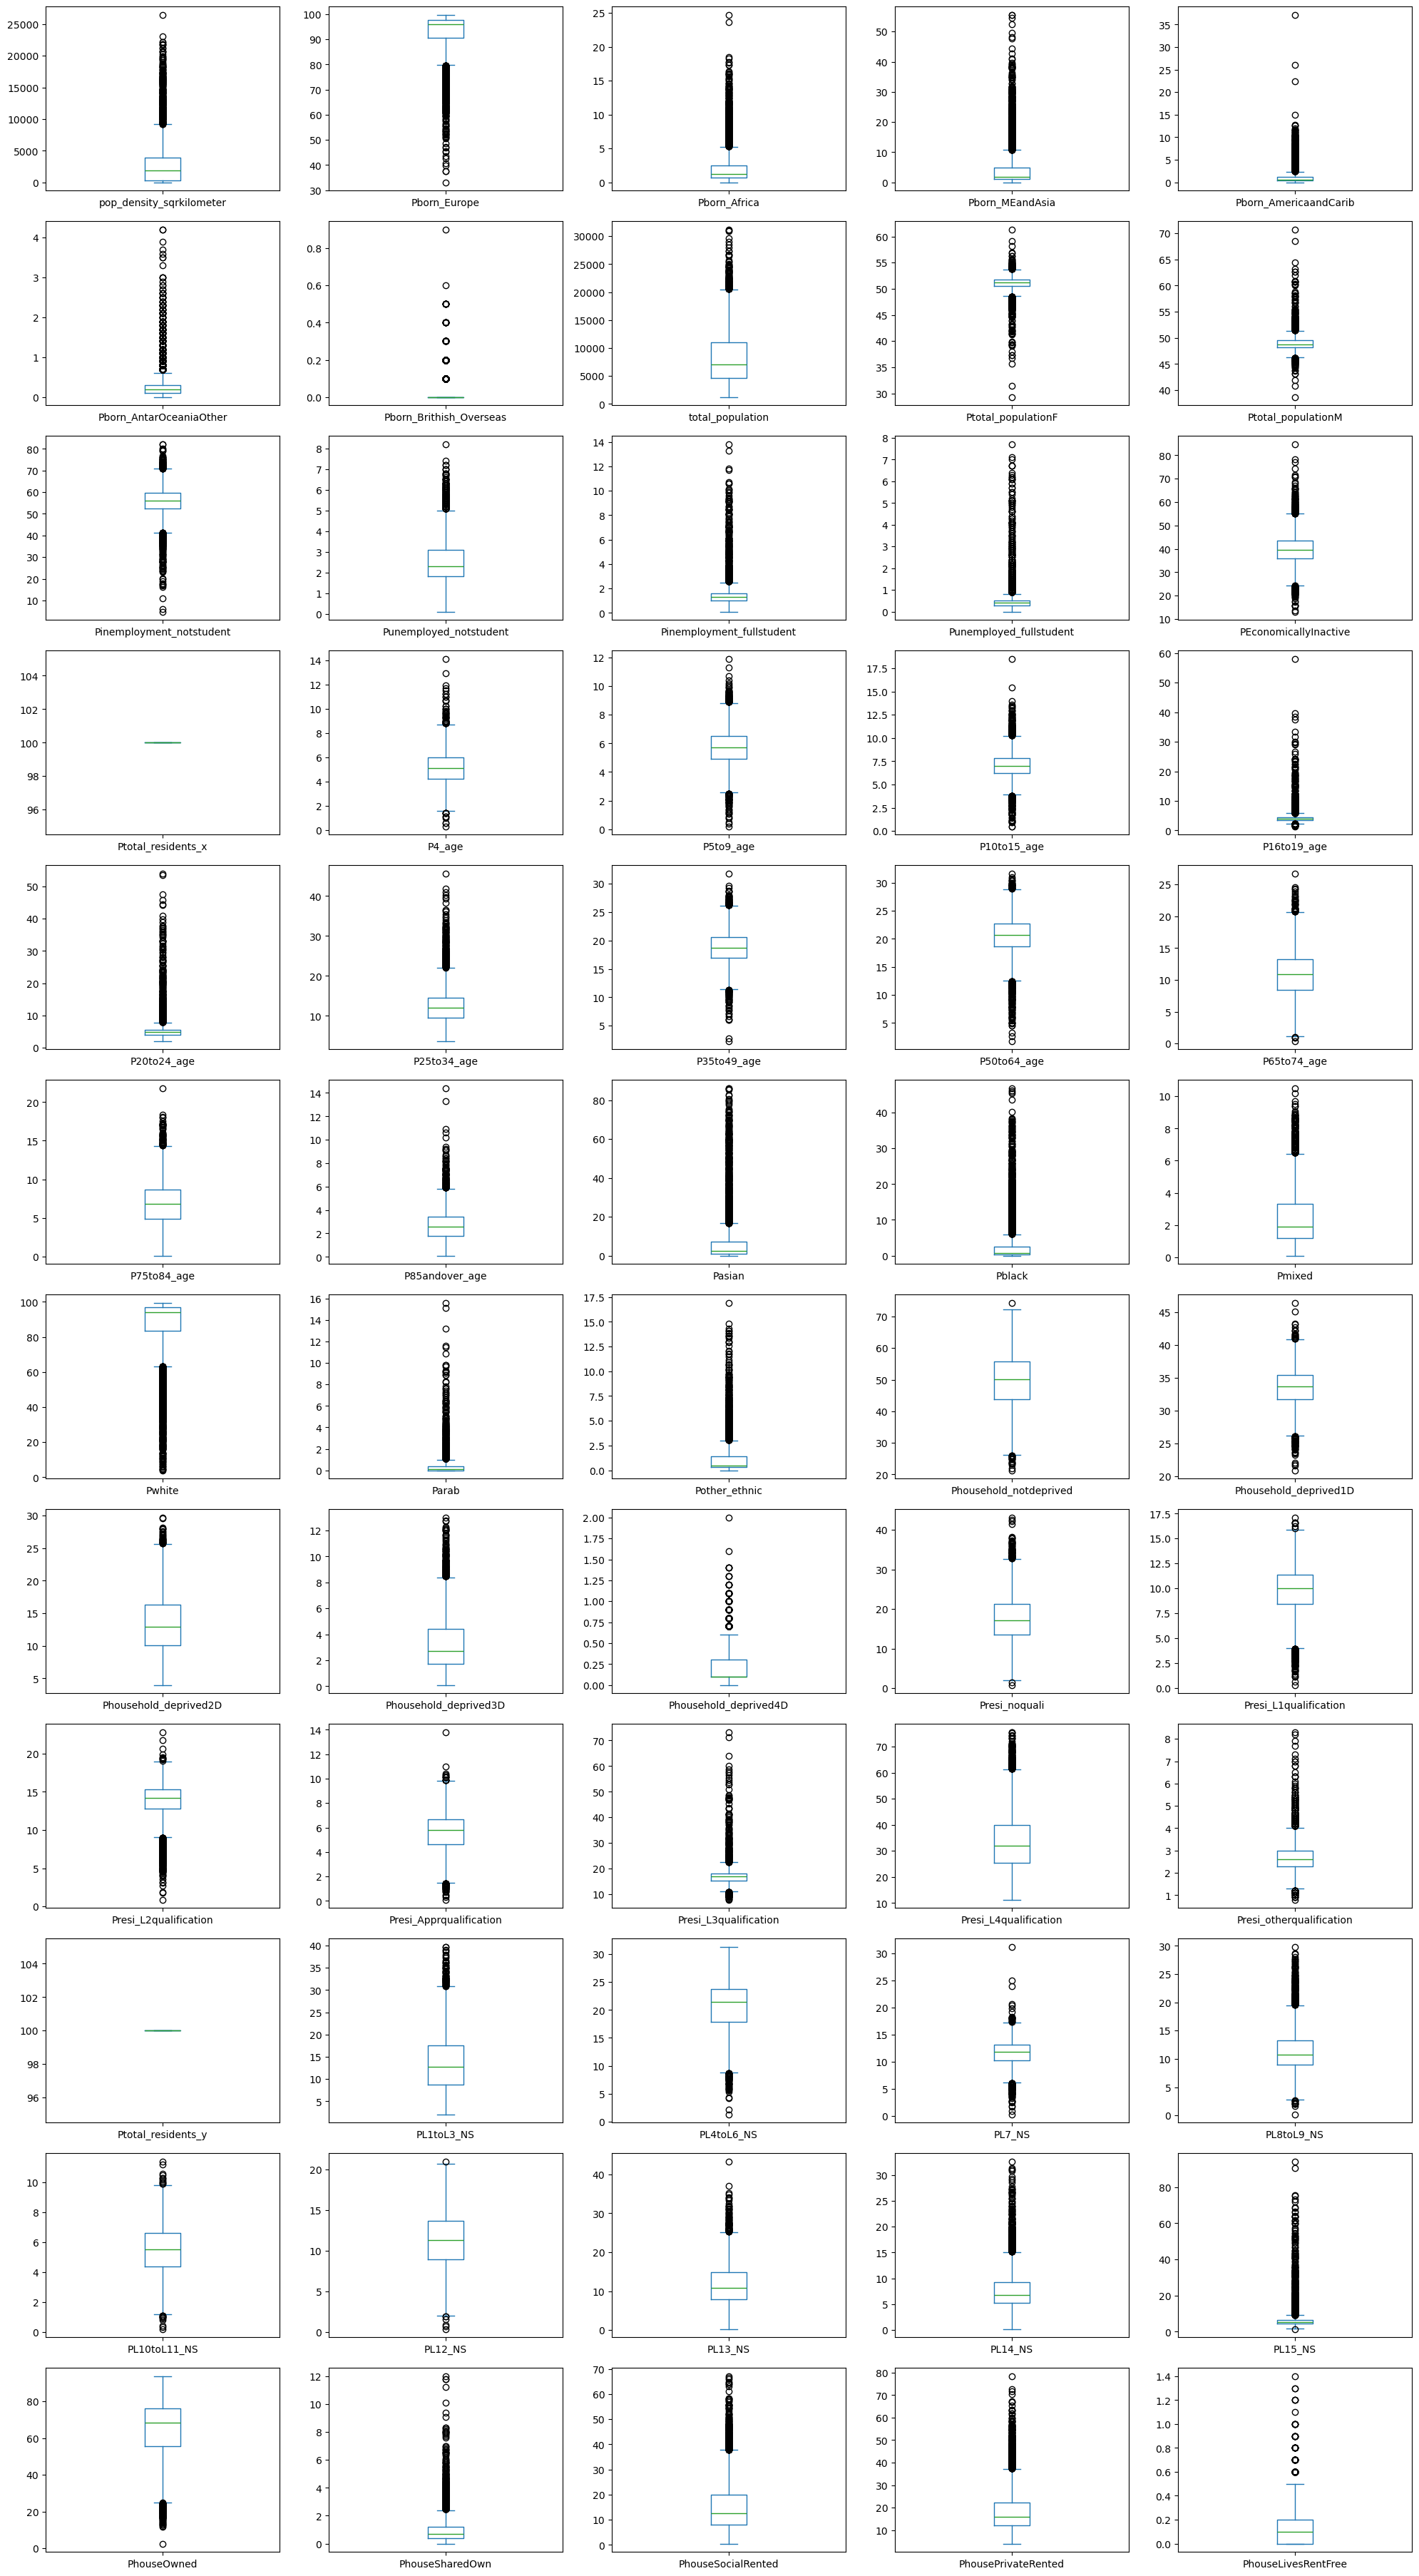

In [77]:
#check distribution
num_columns = len(df4.columns)

ncols = 5  
nrows = math.ceil(num_columns / ncols)

plt.figure(figsize=(20, nrows * 3))

df4.plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(20, nrows * 3), sharex=False, sharey=False)
plt.tight_layout()  #
plt.show()

In [78]:
#check summary statistics
pd.set_option('display.max_columns', None)
desc_stats = df4.describe()

desc_stats_transposed = desc_stats.T

desc_stats_transposed

,count,mean,std,min,25%,50%,75%,max
pop_density_sqrkilometer,6876.0,2709.842772,3184.221254,4.4,316.15,1844.1,3890.375,26449.1
Pborn_Europe,6876.0,92.243775,8.601731,33.1,90.50,95.9,97.700,99.7
Pborn_Africa,6876.0,2.111271,2.432195,0.0,0.70,1.2,2.500,24.7
Pborn_MEandAsia,6876.0,4.191783,5.806491,0.0,1.00,1.8,4.900,55.5
Pborn_AmericaandCarib,6876.0,1.131385,1.634393,0.0,0.40,0.6,1.200,37.1
Pborn_AntarOceaniaOther,6876.0,0.292016,0.351262,0.0,0.10,0.2,0.300,4.2
Pborn_Brithish_Overseas,6876.0,0.022120,0.054078,0.0,0.00,0.0,0.000,0.9
total_population,6876.0,8215.542903,4610.410832,1245.0,4692.00,7132.0,11015.000,31175.0
Ptotal_populationF,6876.0,51.065300,1.416448,29.3,50.50,51.2,51.800,61.3
Ptotal_populationM,6876.0,48.934686,1.416445,38.7,48.20,48.8,49.500,70.7


In [79]:
#check correlation
correlation_matrix = df4.corr()  

def highlight_high_corr(s):
    return ['font-weight: bold' if abs(v) > 0.8 else '' for v in s]

styled_corr_matrix = correlation_matrix.style.apply(highlight_high_corr)

styled_corr_matrix

/var/folders/r0/53lbrfvx4kd2t6dzcz18qbhr0000gn/T/ipykernel_24498/1040213154.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df4.corr()


,pop_density_sqrkilometer,Pborn_Europe,Pborn_Africa,Pborn_MEandAsia,Pborn_AmericaandCarib,Pborn_AntarOceaniaOther,Pborn_Brithish_Overseas,total_population,Ptotal_populationF,Ptotal_populationM,Pinemployment_notstudent,Punemployed_notstudent,Pinemployment_fullstudent,Punemployed_fullstudent,PEconomicallyInactive,Ptotal_residents_x,P4_age,P5to9_age,P10to15_age,P16to19_age,P20to24_age,P25to34_age,P35to49_age,P50to64_age,P65to74_age,P75to84_age,P85andover_age,Pasian,Pblack,Pmixed,Pwhite,Parab,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,Phousehold_deprived2D,Phousehold_deprived3D,Phousehold_deprived4D,Presi_noquali,Presi_L1qualification,Presi_L2qualification,Presi_Apprqualification,Presi_L3qualification,Presi_L4qualification,Presi_otherqualification,Ptotal_residents_y,PL1toL3_NS,PL4toL6_NS,PL7_NS,PL8toL9_NS,PL10toL11_NS,PL12_NS,PL13_NS,PL14_NS,PL15_NS,PhouseOwned,PhouseSharedOwn,PhouseSocialRented,PhousePrivateRented,PhouseLivesRentFree
pop_density_sqrkilometer,1.000000,-0.682480,0.616812,0.565945,0.573676,0.368227,0.334142,0.469559,0.023349,-0.023354,0.091217,0.648525,0.387948,0.344908,-0.292905,nan,0.323835,0.150248,0.028780,0.125644,0.385196,0.676450,0.468877,-0.595073,-0.628320,-0.582871,-0.441334,0.495006,0.619380,0.663007,-0.667354,0.511612,0.648992,-0.305012,0.034107,0.331281,0.442756,0.524047,0.088102,-0.177006,-0.507858,-0.483803,-0.178073,0.227494,0.231937,nan,-0.019645,-0.258606,-0.354767,-0.376075,-0.242464,-0.063570,0.050128,0.439680,0.343848,-0.671957,0.123611,0.447306,0.586883,0.354142
Pborn_Europe,-0.682480,1.000000,-0.841779,-0.930843,-0.622914,-0.315224,-0.367772,-0.505548,0.115769,-0.115765,-0.057249,-0.610131,-0.435925,-0.396708,0.263285,nan,-0.370446,-0.243197,-0.175407,-0.238005,-0.367121,-0.557278,-0.528173,0.630970,0.648380,0.593244,0.431647,-0.847760,-0.704453,-0.718180,0.950055,-0.634729,-0.805790,0.181097,-0.001152,-0.184877,-0.302466,-0.429025,-0.012997,0.276905,0.621964,0.666373,0.265568,-0.364772,-0.375635,nan,-0.115619,0.238716,0.417253,0.217970,0.462954,0.306500,0.102773,-0.448735,-0.427706,0.599122,-0.203419,-0.319146,-0.598669,-0.335044
Pborn_Africa,0.616812,-0.841779,1.000000,0.641656,0.590312,0.274312,0.402989,0.471287,-0.018763,0.018759,0.128537,0.605939,0.377370,0.347775,-0.323016,nan,0.373232,0.264189,0.197943,0.173071,0.277571,0.509610,0.510881,-0.536746,-0.600487,-0.555121,-0.410958,0.574540,0.892691,0.745973,-0.823786,0.544799,0.761741,-0.161592,-0.014798,0.166937,0.283713,0.422675,-0.010957,-0.224108,-0.510556,-0.588469,-0.258903,0.333843,0.264706,nan,0.097486,-0.167221,-0.326148,-0.159541,-0.399993,-0.257419,-0.092772,0.350322,0.336688,-0.572682,0.266481,0.401485,0.460851,0.340760
Pborn_MEandAsia,0.565945,-0.930843,0.641656,1.000000,0.355461,0.123601,0.267499,0.474775,-0.177558,0.177555,-0.036109,0.542905,0.411878,0.380178,-0.150464,nan,0.365327,0.270309,0.210634,0.255659,0.344115,0.449317,0.452786,-0.590769,-0.573901,-0.527229,-0.383686,0.942539,0.479760,0.522606,-0.908097,0.570957,0.682157,-0.235725,0.077499,0.235675,0.317107,0.377862,0.108220,-0.158263,-0.499450,-0.547658,-0.202921,0.216379,0.438659,nan,0.000043,-0.319282,-0.356011,-0.228123,-0.369159,-0.210592,-0.016677,0.504426,0.407234,-0.496247,0.126328,0.230093,0.536682,0.306128
Pborn_AmericaandCarib,0.573676,-0.622914,0.590312,0.355461,1.000000,0.591875,0.315326,0.259065,0.035971,-0.035975,0.185367,0.360772,0.248740,0.202262,-0.307773,nan,0.111804,-0.037028,-0.086607,0.082277,0.264229,0.500453,0.357351,-0.376983,-0.428055,-0.379557,-0.272573,0.246038,0.617744,0.706811,-0.501741,0.440447,0.609655,0.052256,-0.156867,-0.046625,0.075663,0.268933,-0.199505,-0.434154,-0.613907,-0.562965,-0.244211,0.506709,0.068031,nan,0.333216,0.058456,-0.369705,-0.105418,-0.415492,-0.367542,-0.246537,0.086586,0.267528,-0.476953,0.192867,0.248893,0.480248,0.170444
Pborn_AntarOceaniaOther,0.368227,-0.315224,0.274312,0.123601,0.591875,1.000000,0.204713,0.026948,0.066361,-0.066358,0.245783,0.043666,0.064174,0.046796,-0.274833,nan,-0.091762,

# Merge columns and drop unnecessary ones

In [80]:
#Health
TS004GH = TS004GH.assign(
    Very_andGood_health =TS004GH['Very good health'] + TS004GH['Good health'],
    Bad_health=TS004GH['Bad health'] + TS004GH['Very bad health'],
    Fair_health=TS004GH['Fair health']
)

TS004GH.drop(columns=[
    'Bad health', 
    'Very bad health', 'Fair health'
], inplace=True)

In [81]:
#age
df4 = df4.assign(
    P0to15_age=df4['P4_age'] + df4['P5to9_age'] + df4['P10to15_age'],
    P16to49_age=df4['P16to19_age'] + df4['P20to24_age'] + df4['P25to34_age'] + df4['P35to49_age'],
    P50over_age=df4['P50to64_age'] + df4['P65to74_age'] + df4['P75to84_age'] + df4['P85andover_age']
)

df4.drop(columns=[
    'P4_age', 'P5to9_age', 'P10to15_age', 
    'P16to19_age', 'P20to24_age', 
    'P25to34_age', 'P35to49_age', 
    'P50to64_age', 'P65to74_age', 
    'P75to84_age', 'P85andover_age'
], inplace=True)



In [82]:
#ethnicity
df4 = df4.assign(
    Pother_ethnic=df4['Pmixed'] + df4['Parab'] + df4['Pother_ethnic'] +df4['Pblack'] + df4['Pasian']
)

df4.drop(columns=['Pmixed', 'Parab','Pblack','Pasian' ], inplace=True)


In [83]:
#country of birth
df4 = df4.assign(
    Pborn_Europe=df4['Pborn_Europe'] + df4['Pborn_Brithish_Overseas'],
    Pborn_outsideEurope=df4['Pborn_Africa'] + df4['Pborn_MEandAsia'] + df4['Pborn_AmericaandCarib'] + df4['Pborn_AntarOceaniaOther']
)

df4.drop(columns=['Pborn_Brithish_Overseas', 'Pborn_Africa', 'Pborn_MEandAsia', 'Pborn_AmericaandCarib', 'Pborn_AntarOceaniaOther'], inplace=True)


In [84]:
#employment status
df4 = df4.assign(
    Pinemployment=df4['Pinemployment_notstudent'] + df4['Pinemployment_fullstudent'],
    Punemployment=df4['Punemployed_notstudent'] + df4['Punemployed_fullstudent']
)

df4.drop(columns=['Pinemployment_notstudent', 'Pinemployment_fullstudent', 'Punemployed_fullstudent', 'Punemployed_notstudent'], inplace=True)


In [85]:
#Deprivation levels
df4 = df4.assign(
    Phousehold_D2ormore = df4['Phousehold_deprived2D'] + df4['Phousehold_deprived3D']
    + df4['Phousehold_deprived4D'])
    

df4.drop(columns=['Phousehold_deprived2D', 'Phousehold_deprived3D', 'Phousehold_deprived4D'
                 ], inplace=True)

In [86]:
#Qualification levels
df4 = df4.assign(
    Presi_0toL1quali = df4['Presi_noquali'] + df4['Presi_L1qualification'],
    Presi_L2toApprequali = df4['Presi_L2qualification'] + df4['Presi_Apprqualification'] + df4['Presi_otherqualification'],
    Presi_L3toL4quali = df4['Presi_L3qualification'] + df4['Presi_L4qualification']
)

df4.drop(columns=['Presi_noquali', 'Presi_L1qualification', 'Presi_L2qualification', 
                  'Presi_Apprqualification', 'Presi_L3qualification', 'Presi_otherqualification',
                  'Presi_L4qualification'], inplace=True)

In [87]:
#Tenure/Ownership of home
df4 = df4.assign(
    PhouseOwned = df4['PhouseOwned'] + df4['PhouseSharedOwn']+ df4['PhouseLivesRentFree'],
)

df4.drop(columns=['PhouseSharedOwn','PhouseLivesRentFree'] , inplace=True)

In [88]:
# NSSEC working categories

df4 = df4.assign(
    PL1toL9_NS = df4['PL1toL3_NS'] + df4['PL4toL6_NS'] + df4['PL8toL9_NS'],
    PL10toL11_7_NS = df4['PL7_NS'] + df4['PL10toL11_NS'],
    PL12to13NS = df4['PL12_NS'] + df4['PL13_NS'],
    PL14to15NS = df4['PL14_NS'] + df4['PL15_NS']
)

df4.drop(columns=['PL1toL3_NS', 'PL4toL6_NS', 'PL8toL9_NS', 
                  'PL7_NS', 'PL10toL11_NS', 'PL12_NS',
                  'PL13_NS','PL14_NS','PL15_NS'], inplace=True)

In [89]:
df4.drop(columns=['Ptotal_residents_x','Ptotal_residents_y'], inplace=True)

# Merge dataframes

In [90]:
#Merge universities + airports+ General Practices + Pharmacies + Primary Schools

df5 = pd.merge(air_score_wards, GP_count_wards, on=['wardcode', 'ward','Local_Authority_D'])
df5 = pd.merge(df5, PH_count_wards, on=['wardcode', 'ward','Local_Authority_D'])
df5 = pd.merge(df5, uni_score_wards, on=['wardcode', 'ward','Local_Authority_D'])
df5 = pd.merge(df5, Pri_count_wards, on=['wardcode', 'ward','Local_Authority_D'])


df5

,wardcode,ward,Local_Authority_D,air_score_ward,GP_unique_name_count,PH_unique_name_count,Uni_score_ward,PriS_unique_name_count
0,E05013038,Burn Valley,Hartlepool,0,9.0,3.0,0,4.0
1,E05013039,De Bruce,Hartlepool,0,18.0,2.0,0,3.0
2,E05013040,Fens & Greatham,Hartlepool,0,1.0,2.0,0,3.0
3,E05013041,Foggy Furze,Hartlepool,0,2.0,2.0,0,3.0
4,E05013042,Hart,Hartlepool,0,0.0,1.0,0,2.0
...,...,...,...,...,...,...,...,...
6871,E05014383,Taunton North,Somerset West and Taunton,0,2.0,2.0,0,3.0
6872,E05014384,Taunton South,Somerset West and Taunton,0,3.0,2.0,0,3.0
6873,E05014385,Upper Tone,Somerset West and Taunton,0,1.0,1.0,0,6.0
6874,E05014386,Watchet & Stogursey,Somerset West and Taunton,0,2.0,2.0,0,3.0


In [91]:
#Merge with census data
df4 = pd.merge(df4, df5, on=['wardcode', 'ward','Local_Authority_D'])
df4['ward'] = df4['ward'].astype('string')
df4['wardcode'] = df4['wardcode'].astype('string')
df4['Local_Authority_D'] = df4['Local_Authority_D'].astype('string')

df4.head()

,wardcode,ward,Local_Authority_D,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,PhouseOwned,PhouseSocialRented,PhousePrivateRented,P0to15_age,P16to49_age,P50over_age,Pborn_outsideEurope,Pinemployment,Punemployment,Phousehold_D2ormore,Presi_0toL1quali,Presi_L2toApprequali,Presi_L3toL4quali,PL1toL9_NS,PL10toL11_7_NS,PL12to13NS,PL14to15NS,air_score_ward,GP_unique_name_count,PH_unique_name_count,Uni_score_ward,PriS_unique_name_count
0,E05013038,Burn Valley,Hartlepool,2895.6,97.1,7631,51.3,48.7,48.6,94.8,5.2,40.5,33.2,55.9,21.7,22.4,18.6,41.0,40.3,3.0,46.7,4.6,26.3,32.6,22.4,45.1,30.8,16.8,27.8,24.6,0,9.0,3.0,0,4.0
1,E05013039,De Bruce,Hartlepool,2722.9,98.4,8055,52.4,47.6,49.2,97.5,2.5,35.6,33.3,47.6,38.3,14.2,22.6,39.2,38.2,1.6,45.9,4.8,31.0,39.2,25.7,35.1,22.2,16.4,37.3,24.0,0,18.0,2.0,0,3.0
2,E05013040,Fens & Greatham,Hartlepool,331.5,98.8,6380,52.1,47.9,47.3,98.8,1.3,46.9,36.1,80.2,8.9,10.9,13.5,31.3,55.3,1.1,50.3,2.4,16.9,30.2,25.6,44.2,35.9,21.3,28.2,14.6,0,1.0,2.0,0,3.0
3,E05013041,Foggy Furze,Hartlepool,4832.0,97.2,8154,51.3,48.7,48.4,96.2,3.8,39.1,34.5,61.6,16.3,22.0,18.3,37.9,43.8,2.8,47.0,4.5,26.3,36.4,25.5,38.2,26.8,17.6,34.7,20.8,0,2.0,2.0,0,3.0
4,E05013042,Hart,Hartlepool,676.0,98.9,7644,51.8,48.2,34.1,98.2,1.8,55.7,30.6,77.9,9.9,12.2,19.6,43.3,36.9,1.2,63.7,2.2,13.7,21.5,23.7,54.7,43.2,20.2,23.6,13.0,0,0.0,1.0,0,2.0


In [92]:
df4.head()

,wardcode,ward,Local_Authority_D,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,PhouseOwned,PhouseSocialRented,PhousePrivateRented,P0to15_age,P16to49_age,P50over_age,Pborn_outsideEurope,Pinemployment,Punemployment,Phousehold_D2ormore,Presi_0toL1quali,Presi_L2toApprequali,Presi_L3toL4quali,PL1toL9_NS,PL10toL11_7_NS,PL12to13NS,PL14to15NS,air_score_ward,GP_unique_name_count,PH_unique_name_count,Uni_score_ward,PriS_unique_name_count
0,E05013038,Burn Valley,Hartlepool,2895.6,97.1,7631,51.3,48.7,48.6,94.8,5.2,40.5,33.2,55.9,21.7,22.4,18.6,41.0,40.3,3.0,46.7,4.6,26.3,32.6,22.4,45.1,30.8,16.8,27.8,24.6,0,9.0,3.0,0,4.0
1,E05013039,De Bruce,Hartlepool,2722.9,98.4,8055,52.4,47.6,49.2,97.5,2.5,35.6,33.3,47.6,38.3,14.2,22.6,39.2,38.2,1.6,45.9,4.8,31.0,39.2,25.7,35.1,22.2,16.4,37.3,24.0,0,18.0,2.0,0,3.0
2,E05013040,Fens & Greatham,Hartlepool,331.5,98.8,6380,52.1,47.9,47.3,98.8,1.3,46.9,36.1,80.2,8.9,10.9,13.5,31.3,55.3,1.1,50.3,2.4,16.9,30.2,25.6,44.2,35.9,21.3,28.2,14.6,0,1.0,2.0,0,3.0
3,E05013041,Foggy Furze,Hartlepool,4832.0,97.2,8154,51.3,48.7,48.4,96.2,3.8,39.1,34.5,61.6,16.3,22.0,18.3,37.9,43.8,2.8,47.0,4.5,26.3,36.4,25.5,38.2,26.8,17.6,34.7,20.8,0,2.0,2.0,0,3.0
4,E05013042,Hart,Hartlepool,676.0,98.9,7644,51.8,48.2,34.1,98.2,1.8,55.7,30.6,77.9,9.9,12.2,19.6,43.3,36.9,1.2,63.7,2.2,13.7,21.5,23.7,54.7,43.2,20.2,23.6,13.0,0,0.0,1.0,0,2.0


# CAP OUTLIERS

In [93]:
GPq = df4['GP_unique_name_count'].quantile(0.99)
GPq


11.0

In [94]:
PriSq = df4['PriS_unique_name_count'].quantile(0.99)
PriSq


7.0

In [95]:
PHq = df4['PH_unique_name_count'].quantile(0.99)
PHq


6.0

In [96]:
Tpq = df4['total_population'].quantile(0.99)
Tpq


21862.0

In [97]:
Psq = df4['pop_density_sqrkilometer'].quantile(0.99)
Psq

16005.25

In [98]:
# CAP for outliers above the 0.99 quantile
df4.loc[df4['GP_unique_name_count'] > 7, 'GP_unique_name_count'] = 12
df4.loc[df4['PriS_unique_name_count'] > 6, 'PriS_unique_name_count'] = 8
df4.loc[df4['PH_unique_name_count'] > 5, 'PH_unique_name_count'] = 7
df4.loc[df4['total_population'] > 21862, 'total_population'] = 21863
df4.loc[df4['pop_density_sqrkilometer'] > 16005, 'pop_density_sqrkilometer'] = 16006



# Basic Statistics of final DF

In [99]:
#summary statistics
pd.set_option('display.max_columns', None)
df4.describe()

,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,PhouseOwned,PhouseSocialRented,PhousePrivateRented,P0to15_age,P16to49_age,P50over_age,Pborn_outsideEurope,Pinemployment,Punemployment,Phousehold_D2ormore,Presi_0toL1quali,Presi_L2toApprequali,Presi_L3toL4quali,PL1toL9_NS,PL10toL11_7_NS,PL12to13NS,PL14to15NS,air_score_ward,GP_unique_name_count,PH_unique_name_count,Uni_score_ward,PriS_unique_name_count
count,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000,6876.000000
mean,2686.634482,92.265896,8191.007853,51.065300,48.934686,39.664776,86.407097,13.589267,49.561853,33.472629,65.963976,15.268412,18.766390,17.885137,41.102240,41.012595,7.726454,57.267016,3.067685,16.965096,27.451236,22.039049,50.509453,45.544430,17.127952,23.050145,14.277109,0.104130,1.426702,1.264107,0.215678,2.213496
std,3069.841305,8.581990,4524.550454,1.416448,1.416445,6.503588,17.072932,17.074525,8.314915,2.829480,15.198387,10.259707,9.567682,3.546198,8.695388,10.188506,8.581464,6.515707,1.342550,6.362308,7.585036,3.799126,10.375530,11.407721,3.040013,7.783979,7.355564,0.320781,2.246162,1.430493,0.438701,1.717020
min,4.400000,33.200000,1245.000000,29.300000,38.700000,13.100000,4.000000,0.600000,21.300000,20.900000,2.600000,0.500000,4.000000,1.000000,16.400000,2.400000,0.300000,12.900000,0.600000,4.100000,1.100000,2.100000,22.200000,4.500000,0.500000,0.700000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,316.150000,90.500000,4692.000000,50.500000,48.200000,35.800000,83.400000,3.100000,43.900000,31.700000,57.000000,8.000000,12.200000,15.700000,35.300000,34.300000,2.300000,53.700000,2.100000,12.000000,22.100000,20.500000,43.100000,37.300000,15.400000,17.100000,10.100000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1844.100000,95.900000,7132.000000,51.200000,48.800000,39.600000,94.100000,5.900000,50.100000,33.700000,69.600000,12.500000,15.800000,17.800000,40.000000,41.500000,4.100000,57.500000,2.700000,15.800000,27.000000,22.900000,49.900000,46.300000,17.500000,22.300000,11.900000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,3890.375000,97.700000,11015.000000,51.800000,49.500000,43.500000,96.900000,16.600000,55.800000,35.400000,77.225000,19.900000,22.200000,20.000000,45.200000,48.200000,9.400000,61.200000,3.700000,20.900000,32.500000,24.700000,56.900000,54.300000,19.300000,28.500000,15.800000,0.000000,2.000000,2.000000,0.000000,3.000000
max,16006.000000,99.700000,21863.000000,61.300000,70.700000,84.700000,99.400000,96.000000,74.300000,46.400000,94.300000,67.100000,78.400000,33.100000,96.600000,75.300000,66.900000,83.800000,12.100000,43.100000,55.100000,30.100000,96.900000,77.500000,35.000000,56.400000,94.300000,2.000000,12.000000,7.000000,2.000000,8.000000


In [100]:
pd.set_option('display.max_columns', None)
desc_stats = df4.describe()

desc_stats_transposeddf4 = desc_stats.T

desc_stats_transposeddf4

,count,mean,std,min,25%,50%,75%,max
pop_density_sqrkilometer,6876.0,2686.634482,3069.841305,4.4,316.15,1844.1,3890.375,16006.0
Pborn_Europe,6876.0,92.265896,8.581990,33.2,90.50,95.9,97.700,99.7
total_population,6876.0,8191.007853,4524.550454,1245.0,4692.00,7132.0,11015.000,21863.0
Ptotal_populationF,6876.0,51.065300,1.416448,29.3,50.50,51.2,51.800,61.3
Ptotal_populationM,6876.0,48.934686,1.416445,38.7,48.20,48.8,49.500,70.7
PEconomicallyInactive,6876.0,39.664776,6.503588,13.1,35.80,39.6,43.500,84.7
Pwhite,6876.0,86.407097,17.072932,4.0,83.40,94.1,96.900,99.4
Pother_ethnic,6876.0,13.589267,17.074525,0.6,3.10,5.9,16.600,96.0
Phousehold_notdeprived,6876.0,49.561853,8.314915,21.3,43.90,50.1,55.800,74.3
Phousehold_deprived1D,6876.0,33.472629,2.829480,20.9,31.70,33.7,35.400,46.4


In [101]:
#correlation
correlation_matrix = df4.corr(numeric_only=True)

def highlight_high_corr(s):
    return ['background-color: yellow' if abs(v) > 0.8 else '' for v in s]

styled_corr_matrix = correlation_matrix.style.apply(highlight_high_corr)

styled_corr_matrix

,pop_density_sqrkilometer,Pborn_Europe,total_population,Ptotal_populationF,Ptotal_populationM,PEconomicallyInactive,Pwhite,Pother_ethnic,Phousehold_notdeprived,Phousehold_deprived1D,PhouseOwned,PhouseSocialRented,PhousePrivateRented,P0to15_age,P16to49_age,P50over_age,Pborn_outsideEurope,Pinemployment,Punemployment,Phousehold_D2ormore,Presi_0toL1quali,Presi_L2toApprequali,Presi_L3toL4quali,PL1toL9_NS,PL10toL11_7_NS,PL12to13NS,PL14to15NS,air_score_ward,GP_unique_name_count,PH_unique_name_count,Uni_score_ward,PriS_unique_name_count
pop_density_sqrkilometer,1.000000,-0.687225,0.483293,0.022891,-0.022897,-0.298256,-0.673222,0.673254,-0.309477,0.036090,-0.676493,0.446166,0.596213,0.192695,0.684985,-0.651656,0.687372,0.157143,0.681977,0.388440,0.017004,-0.490330,0.167081,-0.231087,-0.383032,0.011848,0.504430,-0.003629,0.215187,0.294638,0.204070,-0.022512
Pborn_Europe,-0.687225,1.000000,-0.507257,0.115893,-0.115889,0.263208,0.949881,-0.949868,0.180814,-0.001056,0.591500,-0.318358,-0.598362,-0.293426,-0.655898,0.661887,-0.999968,-0.126128,-0.662705,-0.235857,0.073499,0.612366,-0.277854,0.093688,0.539544,0.191055,-0.570722,-0.009467,-0.266929,-0.308163,-0.238292,-0.048091
total_population,0.483293,-0.507257,1.000000,-0.027375,0.027371,-0.174652,-0.561064,0.561088,-0.275718,0.014551,-0.445534,0.341014,0.341993,0.341846,0.514369,-0.557993,0.507181,0.059071,0.558607,0.353730,0.113210,-0.287305,0.022368,-0.300734,-0.197523,0.079889,0.463823,0.116015,0.420379,0.553187,0.341737,0.489021
Ptotal_populationF,0.022891,0.115893,-0.027375,1.000000,-1.000000,0.124579,0.110588,-0.110511,-0.003300,0.013452,0.101954,0.082647,-0.250562,0.027382,-0.253959,0.207275,-0.115892,-0.103271,-0.102762,-0.001343,-0.041704,-0.018252,0.037120,0.115050,0.016231,-0.068421,-0.112632,0.003536,-0.070999,0.009678,0.009003,-0.001720
Ptotal_populationM,-0.022897,-0.115889,0.027371,-1.000000,1.000000,-0.124596,-0.110584,0.110507,0.003305,-0.013461,-0.101937,-0.082655,0.250542,-0.027370,0.253935,-0.207260,0.115888,0.103292,0.102739,0.001341,0.041719,0.018275,-0.037140,-0.115038,-0.016205,0.068432,0.112590,-0.003533,0.071006,-0.009669,-0.008998,0.001733
PEconomicallyInactive,-0.298256,0.263208,-0.174652,0.124579,-0.124596,1.000000,0.223828,-0.223891,-0.330784,0.459362,0.154541,-0.049270,-0.192665,-0.435694,-0.458959,0.543265,-0.263226,-0.978726,-0.093747,0.228073,0.265730,0.223487,-0.276039,-0.230353,-0.063680,0.128467,0.247668,0.014245,-0.009245,-0.027990,-0.016230,-0.009374
Pwhite,-0.673222,0.949881,-0.561064,0.110588,-0.110584,0.223828,1.000000,-0.999992,0.294191,-0.083627,0.567271,-0.360754,-0.514389,-0.402298,-0.629184,0.676963,-0.949886,-0.076342,-0.713611,-0.347371,-0.066769,0.511244,-0.138299,0.210398,0.460529,0.085040,-0.606964,-0.010458,-0.283280,-0.340911,-0.231849,-0.099245
Pother_ethnic,0.673254,-0.949868,0.561088,-0.110511,0.110507,-0.223891,-0.999992,1.000000,-0.294164,0.083566,-0.567283,0.360759,0.514404,0.402320,0.629204,-0.676987,0.949873,0.076403,0.713614,0.347362,0.066730,-0.511299,0.138347,-0.210361,-0.460561,-0.085080,0.606962,0.010463,0.283375,0.340972,0.231864,0.099208
Phousehold_notdeprived,-0.309477,0.180814,-0.275718,-0.003300,0.003305,-0.330784,0.294191,-0.294164,1.000000,-0.779320,0.564541,-0.631364,-0.219781,-0.245938,-0.165854,0.227213,-0.180860,0.452798,-0.595469,-0.960395,-0.869652,-0.316666,0.751710,0.854009,-0.082137,-0.782168,-0.463245,-0.032986,-0.200689,-0.267237,-0.028340,-0.081526
Phousehold_deprived1D,0.036090,-0.001056,0.014551,0.013452,-0.013461,0.459362,-0.083627,0.083566,-0.779320,1.000000,-0.169691,0.216078,0.037882,-0.053882,-0.161693,0.156568,0.001082,-0.503996,0.221136,0.573965,0.722785,0.469828,-0.700413,-0.596902,0.245506,0.604988,0.184250,0.031442,0.036529,0.082722,-0.080820,-0.013405


<Figure size 2000x1500 with 0 Axes>

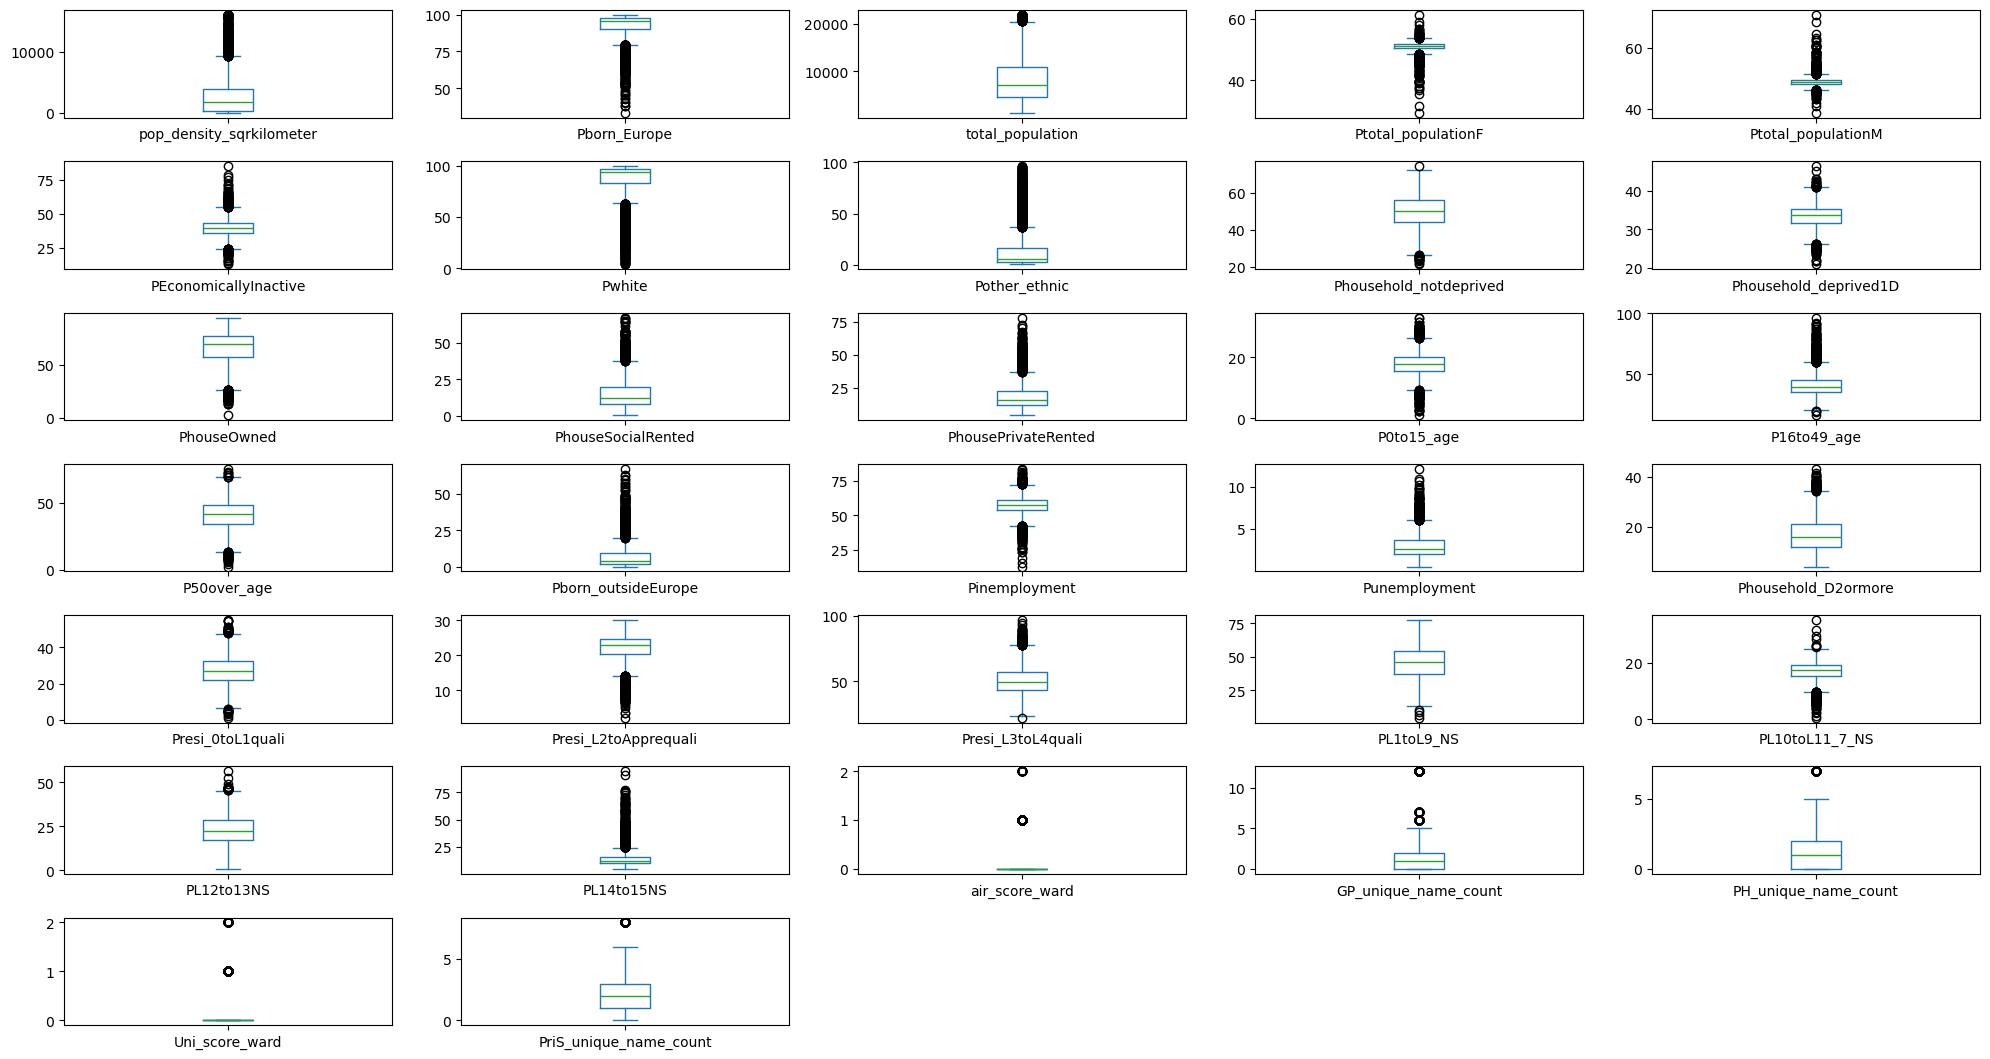

In [102]:
#distribution
plt.figure(figsize=(20, 15))  
df4.plot(kind='box', subplots=True, layout=(10, 5), figsize=(20, 15), sharex=False, sharey=False)
plt.tight_layout()  
plt.show()

In [103]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 6875
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wardcode                  6876 non-null   string 
 1   ward                      6876 non-null   string 
 2   Local_Authority_D         6125 non-null   string 
 3   pop_density_sqrkilometer  6876 non-null   float64
 4   Pborn_Europe              6876 non-null   float64
 5   total_population          6876 non-null   int64  
 6   Ptotal_populationF        6876 non-null   float64
 7   Ptotal_populationM        6876 non-null   float64
 8   PEconomicallyInactive     6876 non-null   float64
 9   Pwhite                    6876 non-null   float64
 10  Pother_ethnic             6876 non-null   float64
 11  Phousehold_notdeprived    6876 non-null   float64
 12  Phousehold_deprived1D     6876 non-null   float64
 13  PhouseOwned               6876 non-null   float64
 14  PhouseSo

In [104]:
df4.to_csv('generated_df/dfwod.csv', index=False)

# ADD DUMMY VARIABLES

In [105]:
dfWD = df4.copy()

In [106]:
#the ward is in the 0.25 quantile or below in total population
quantile_population = dfWD['total_population'].quantile(0.25)

thresholdp1 = quantile_population
                          

In [107]:
dfWD['small_communities'] = (dfWD['total_population'] < thresholdp1).astype(int)


In [108]:
#the ward is in the 0.25 quantile or below in population per square meter

quantile_density = dfWD['pop_density_sqrkilometer'].quantile(0.25)

thresholdpd2 = quantile_density



In [109]:
dfWD['rural_communites'] = (dfWD['pop_density_sqrkilometer'] < thresholdpd2).astype(int)

In [110]:
#the majority of the population in the ward has L3L4 qualification
dfWD['majorityL3L4q']=(dfWD['Presi_L3toL4quali']>50)*1 

#the majority of the population in the ward has is 16 to 49
dfWD['majorityP16to49_age']=(dfWD['P16to49_age']>50)*1 

# Low deprivation areas wards where the majority of households are not defined as deprived on any dimension (percentage of non-deprived above 50%)
dfWD['dnone50']=(dfWD['Phousehold_notdeprived']>50)*1 

#has one GP or more in the ward
dfWD['GP_above1'] = (dfWD['GP_unique_name_count'] >= 1).astype(int) 

# Low deprivation areas wards where the majority of households are in very good health (percentage above 50%)
dfWD['VeryGoodhealth']=(TS004GH['Very good health']>50)*1 

#has one pharmacy or more in the ward
dfWD['PH_above1'] = (dfWD['PH_unique_name_count'] >= 1).astype(int) 


In [113]:
dfWD.to_csv('generated_df/dfWD.csv', index=False)